In [123]:
import pandas as pd
import numpy as np
#pd.options.mode.chained_assignment = None
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

macro = pd.read_csv('macro.csv', header = 0)
print macro.shape

(2484, 100)


In [124]:
# только за период train и test
train_dates = macro['timestamp'].map(lambda x: (x >= '2011-07-20') & (x <= '2015-06-30'))
test_dates = macro['timestamp'].map(lambda x: (x >= '2015-07-01') & (x <= '2016-05-30'))
macro = macro[train_dates | test_dates]
print macro.shape
macro.head()

(1777, 100)


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
565,2011-07-20,115.74,14313.7,3.3,354.0,428.5,86.721,17.19,10.1,28.0065,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
566,2011-07-21,115.74,14313.7,3.3,354.0,428.5,86.721,17.19,10.1,27.7447,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
567,2011-07-22,115.74,14313.7,3.3,354.0,428.5,86.721,17.19,10.1,27.7703,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
568,2011-07-23,115.74,14313.7,3.3,354.0,428.5,86.721,17.19,10.1,27.7703,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
569,2011-07-24,115.74,14313.7,3.3,354.0,428.5,86.721,17.19,10.1,27.7703,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


In [125]:
# преобразуем тип в datetime
macro.timestamp = pd.to_datetime(macro.timestamp)

In [126]:
#########
macro_usd = macro[['timestamp', 'usdrub']]
macro_usd['shift_val'] = 0
macro_usd.head(5)

C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,usdrub,shift_val
565,2011-07-20,28.0065,0
566,2011-07-21,27.7447,0
567,2011-07-22,27.7703,0
568,2011-07-23,27.7703,0
569,2011-07-24,27.7703,0


In [127]:
########### TEST!!!
for i in range(len(macro_usd['usdrub'])):
    macro_usd.iloc[i,2] = macro_usd.iloc[i-30:i,1].mean()
macro_usd[macro_usd['timestamp'] >= '2011-08-20'].head(30)
###########

,timestamp,usdrub,shift_val
596,2011-08-20,29.0048,28.350663
597,2011-08-21,29.0048,28.392667
598,2011-08-22,29.1005,28.433817
599,2011-08-23,28.9525,28.478157
600,2011-08-24,28.9506,28.517563
601,2011-08-25,28.9342,28.559023
602,2011-08-26,28.8082,28.606493
603,2011-08-27,28.8082,28.648940
604,2011-08-28,28.8082,28.689343
605,2011-08-29,28.7920,28.729220


In [4]:
# исправление некорректных записей
macro.loc[macro.child_on_acc_pre_school == '#!','child_on_acc_pre_school'] = np.NaN
macro.child_on_acc_pre_school.replace(',', '.', regex = True, inplace = True)
macro.child_on_acc_pre_school = pd.to_numeric(macro.child_on_acc_pre_school)

macro.modern_education_share.replace(',', '.', regex = True, inplace = True)
macro.modern_education_share = pd.to_numeric(macro.modern_education_share)

macro.old_education_build_share.replace(',', '.', regex = True, inplace = True)
macro.old_education_build_share = pd.to_numeric(macro.old_education_build_share)

In [5]:
# процент NA по столбцам
macro_train = macro[train_dates]
macro_test = macro[test_dates]
print 'Train dates:'
for i in range(1, macro_train.shape[1]):
    if macro_train.iloc[:,i].count() != macro_train.shape[0]:
        print macro_train.columns[i], (1-1.0*macro_train.iloc[:,i].count()/macro_train.shape[0])*100
print 'Test dates:'
for i in range(1, macro_test.shape[1]):
    if macro_test.iloc[:,i].count() != macro_test.shape[0]:
        print macro_test.columns[i], (1-1.0*macro_test.iloc[:,i].count()/macro_test.shape[0])*100

Train dates:
grp 12.8277817151
grp_growth 12.8277817151
real_dispos_income_per_cap_growth 12.8277817151
profitable_enterpr_share 12.8277817151
unprofitable_enterpr_share 12.8277817151
share_own_revenues 12.8277817151
overdue_wages_per_cap 12.8277817151
fin_res_per_cap 12.8277817151
marriages_per_1000_cap 12.8277817151
divorce_rate 12.8277817151
construction_value 12.8277817151
invest_fixed_assets_phys 12.8277817151
pop_migration 12.8277817151
pop_total_inc 12.8277817151
housing_fund_sqm 12.8277817151
lodging_sqm_per_cap 12.8277817151
water_pipes_share 12.8277817151
baths_share 12.8277817151
sewerage_share 12.8277817151
gas_share 12.8277817151
hot_water_share 12.8277817151
electric_stove_share 12.8277817151
heating_share 12.8277817151
old_house_share 12.8277817151
infant_mortarity_per_1000_cap 12.8277817151
perinatal_mort_per_1000_cap 12.8277817151
incidence_population 12.8277817151
load_of_teachers_preschool_per_teacher 38.6959603118
child_on_acc_pre_school 22.3245924876
modern_educati

C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# столбцы, полностью состоящие из NA на даты test
fully_NA_in_test = []
for i in range(1, macro_test.shape[1]):
    if macro_test.iloc[:,i].count() == 0:
        fully_NA_in_test.append(macro_test.columns[i])
print len(fully_NA_in_test)
print fully_NA_in_test

40
['grp', 'grp_growth', 'real_dispos_income_per_cap_growth', 'profitable_enterpr_share', 'unprofitable_enterpr_share', 'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap', 'marriages_per_1000_cap', 'divorce_rate', 'construction_value', 'invest_fixed_assets_phys', 'pop_migration', 'pop_total_inc', 'housing_fund_sqm', 'lodging_sqm_per_cap', 'water_pipes_share', 'baths_share', 'sewerage_share', 'gas_share', 'hot_water_share', 'electric_stove_share', 'heating_share', 'old_house_share', 'infant_mortarity_per_1000_cap', 'perinatal_mort_per_1000_cap', 'incidence_population', 'load_of_teachers_preschool_per_teacher', 'child_on_acc_pre_school', 'provision_doctors', 'power_clinics', 'hospital_beds_available_per_cap', 'hospital_bed_occupancy_per_year', 'provision_retail_space_sqm', 'provision_retail_space_modern_sqm', 'theaters_viewers_per_1000_cap', 'museum_visitis_per_100_cap', 'population_reg_sports_share', 'students_reg_sports_share', 'apartment_build']


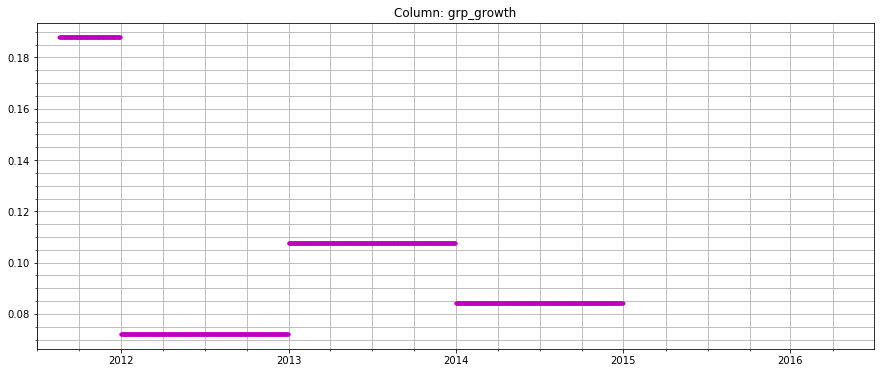

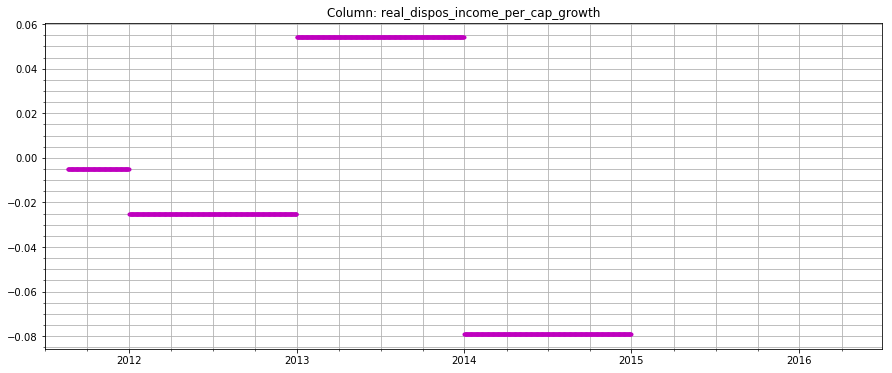

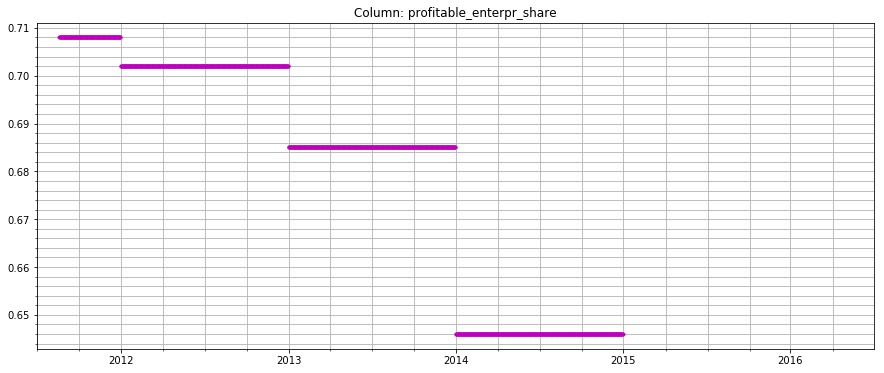

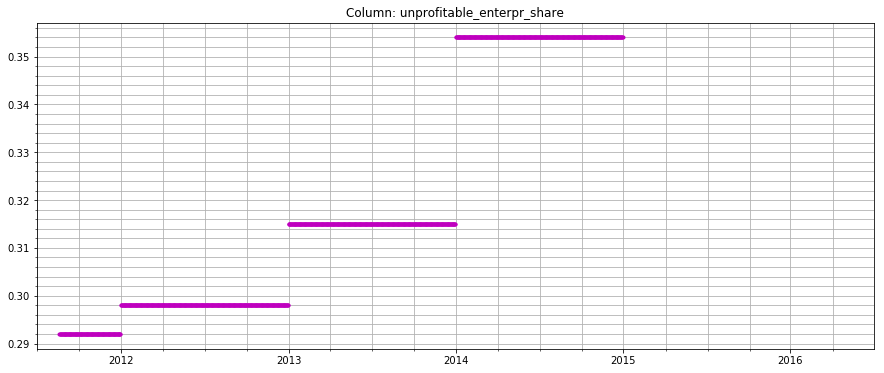

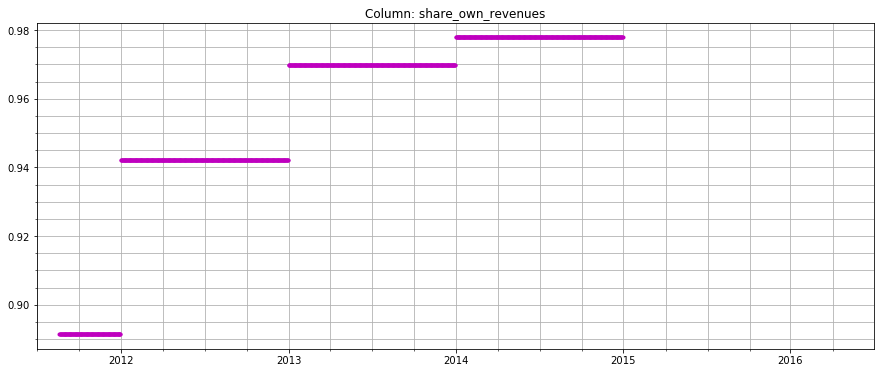

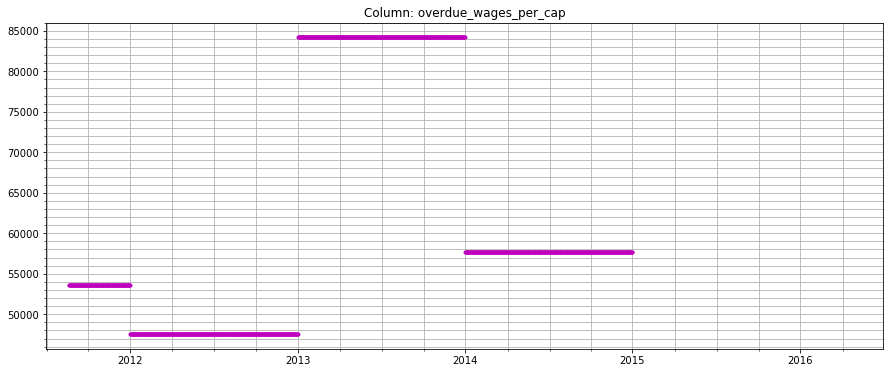

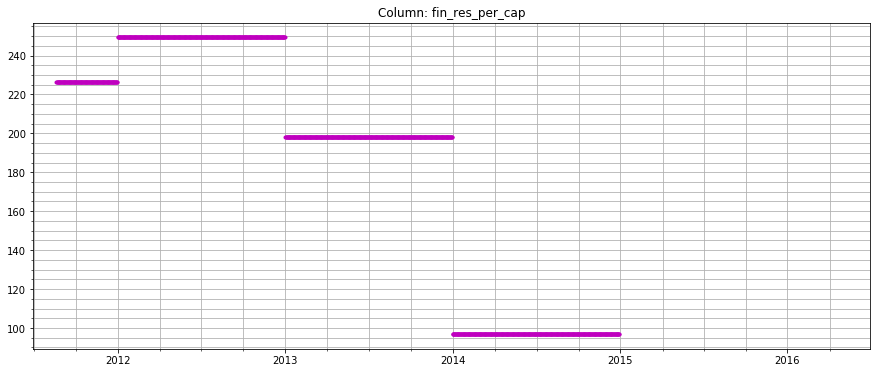

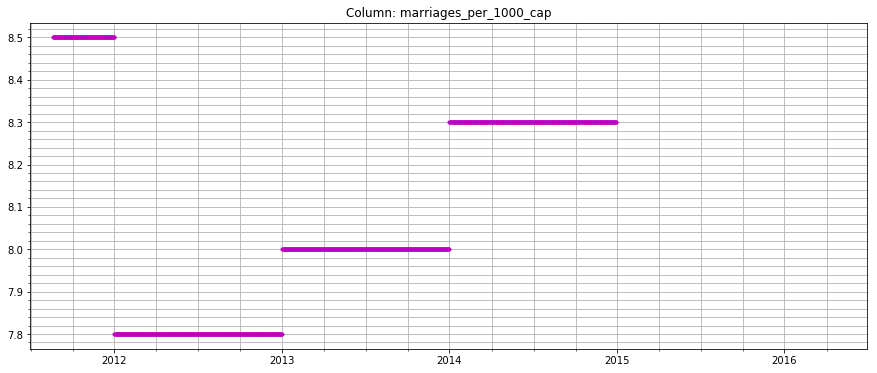

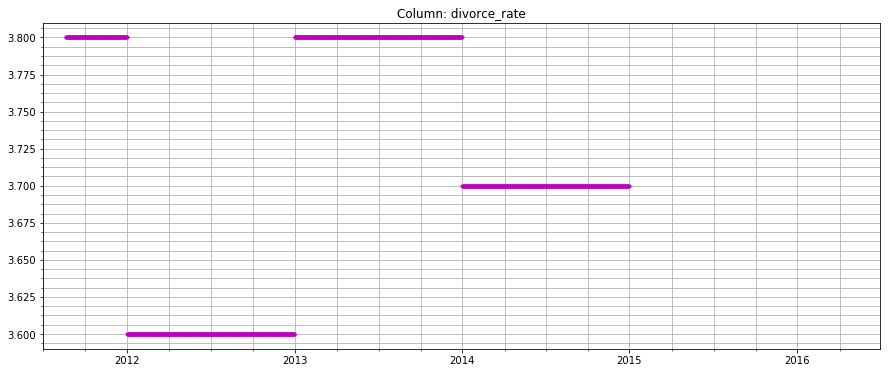

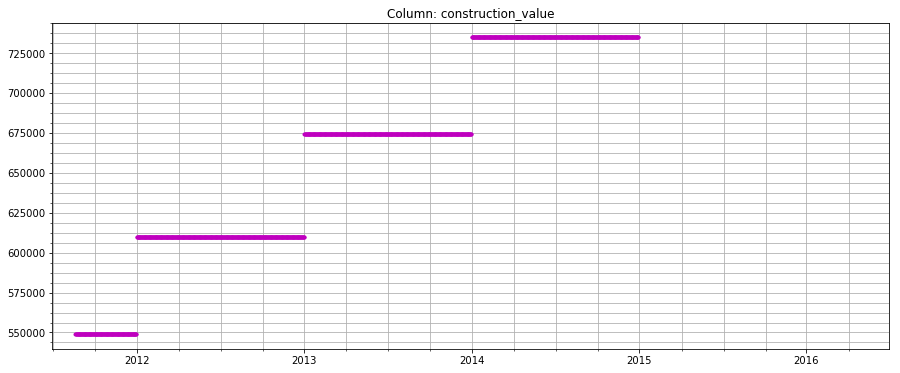

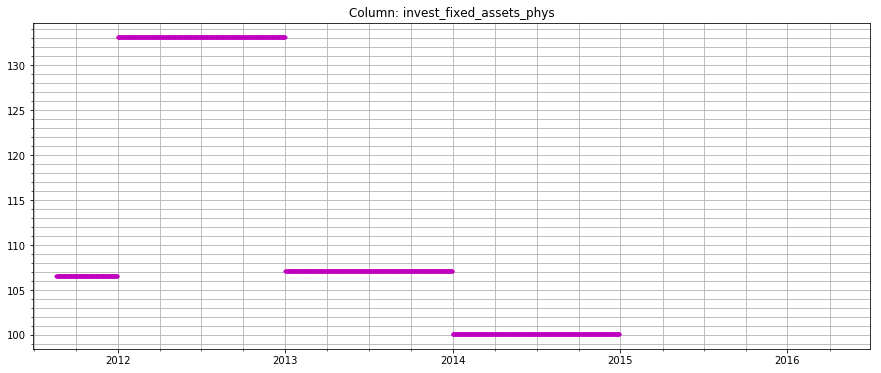

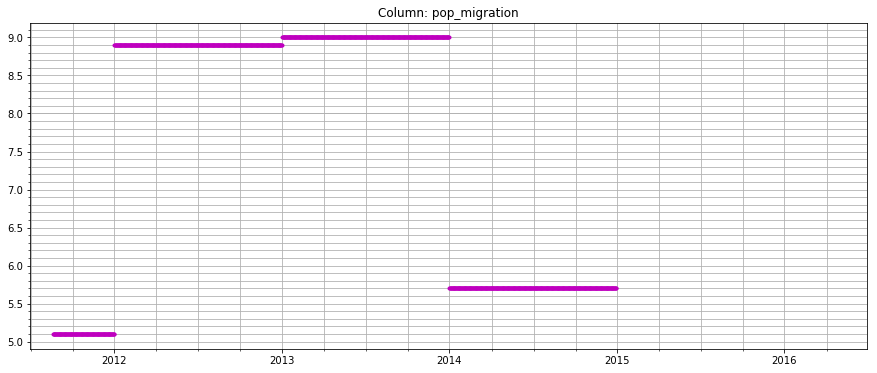

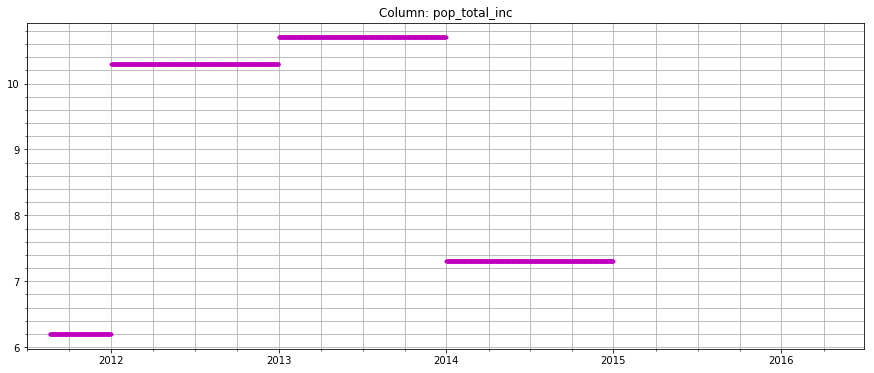

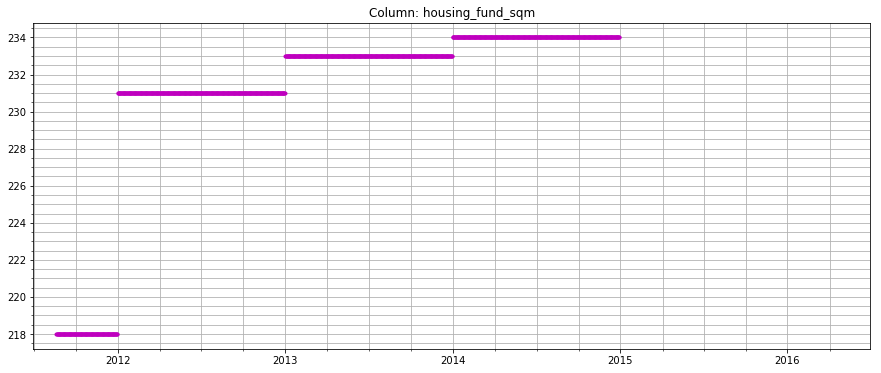

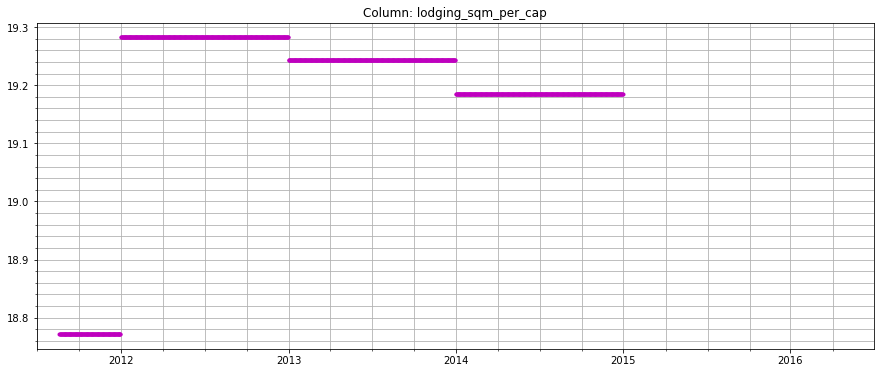

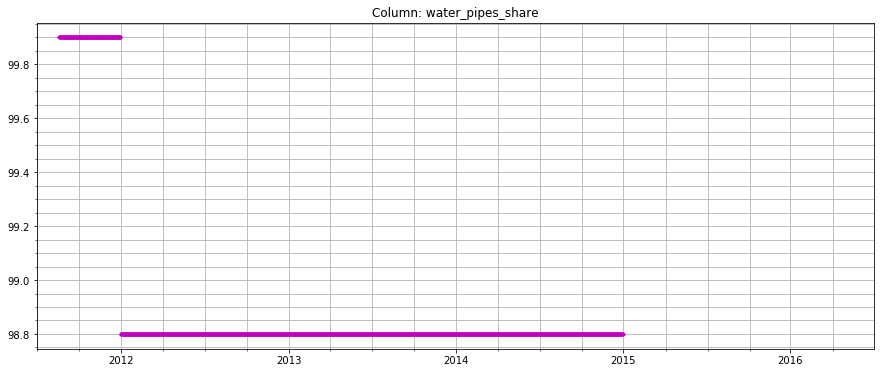

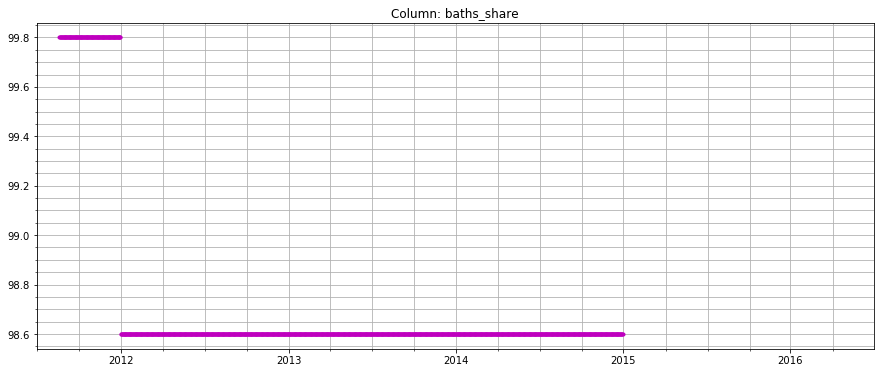

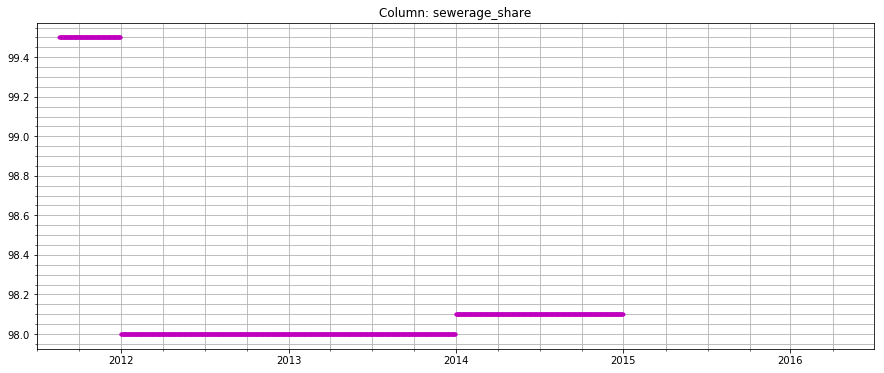

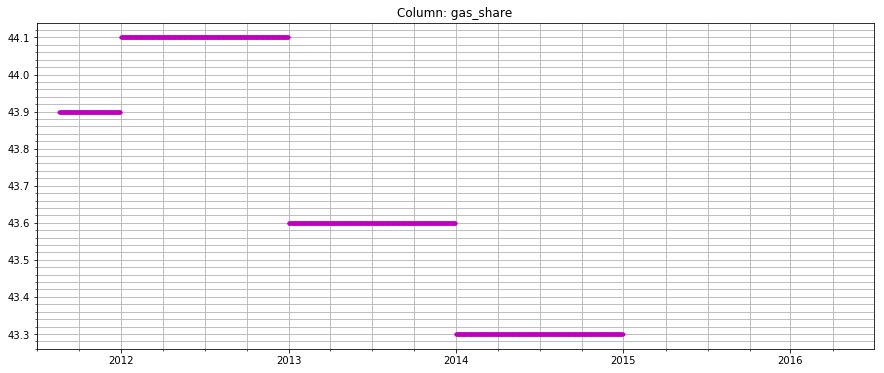

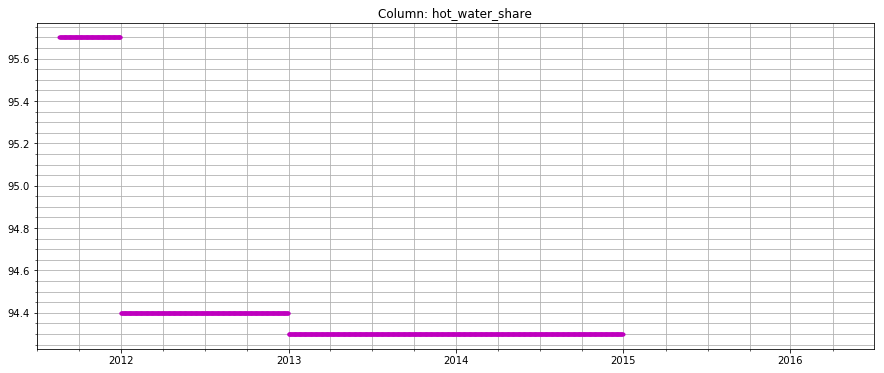

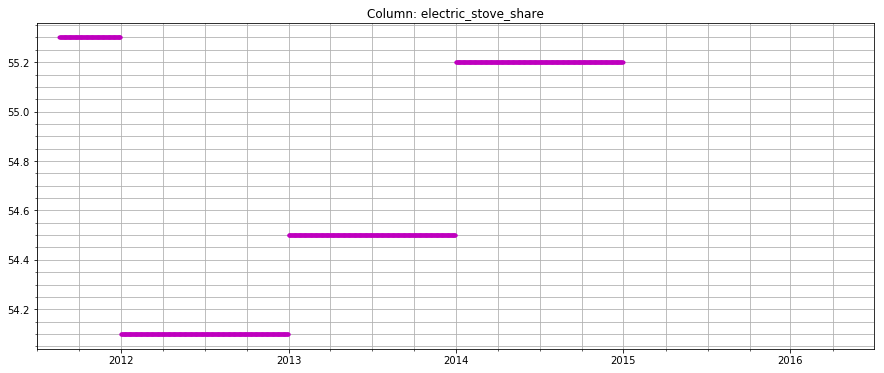

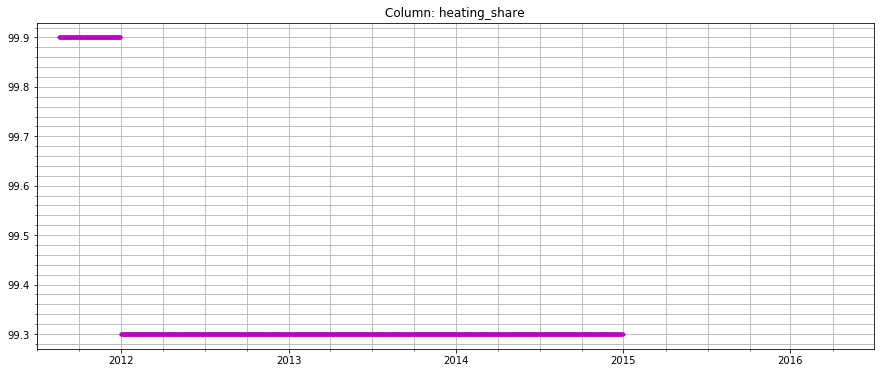

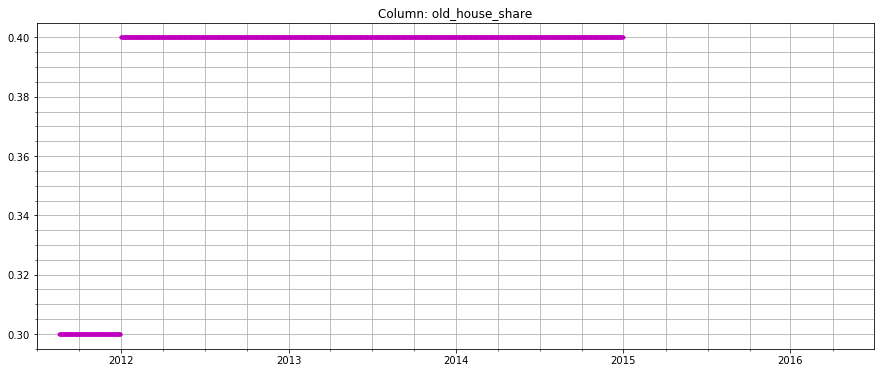

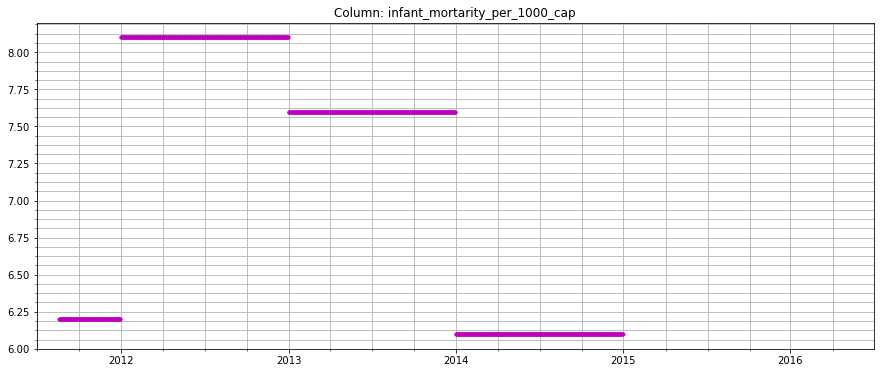

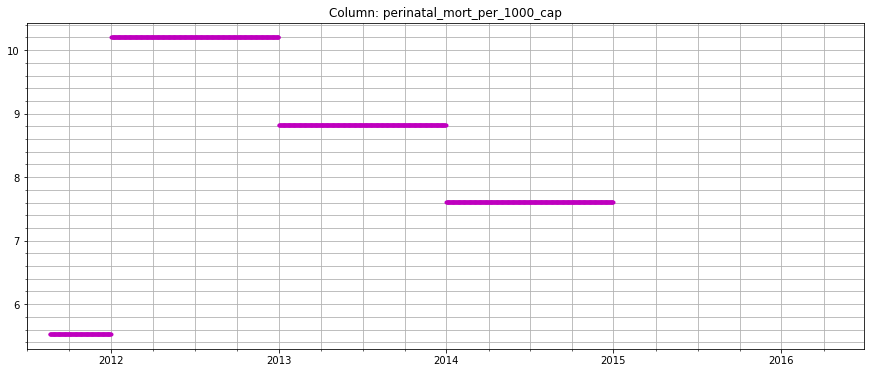

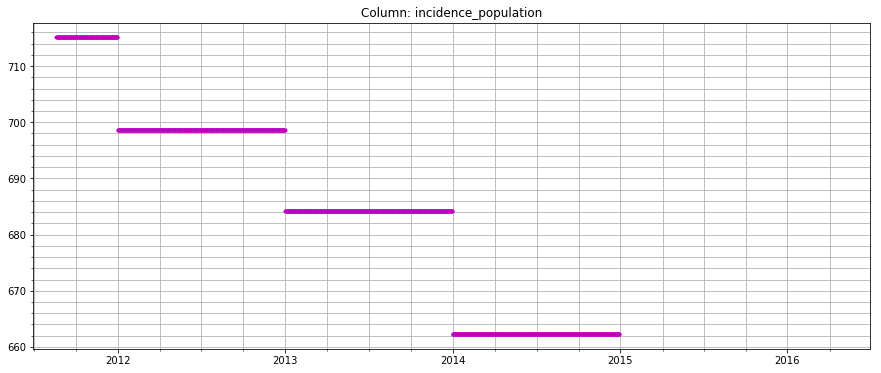

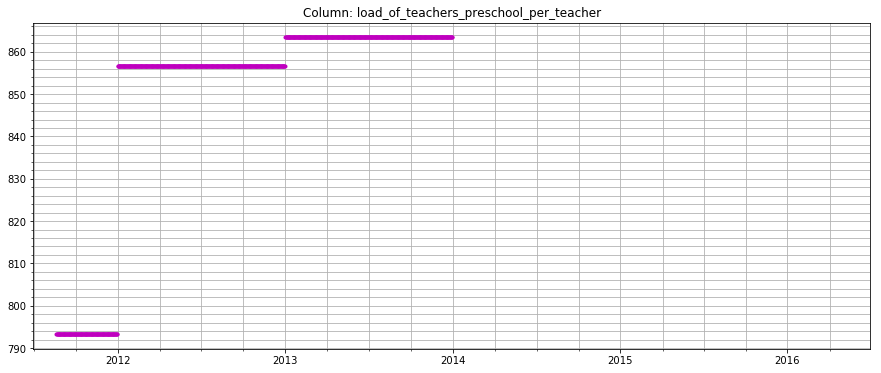

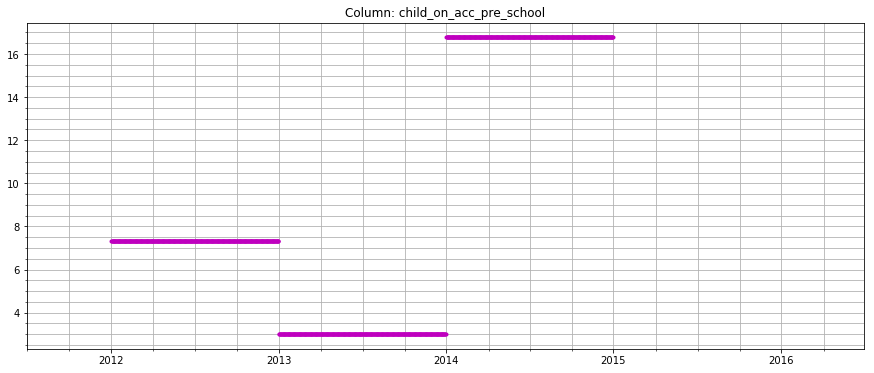

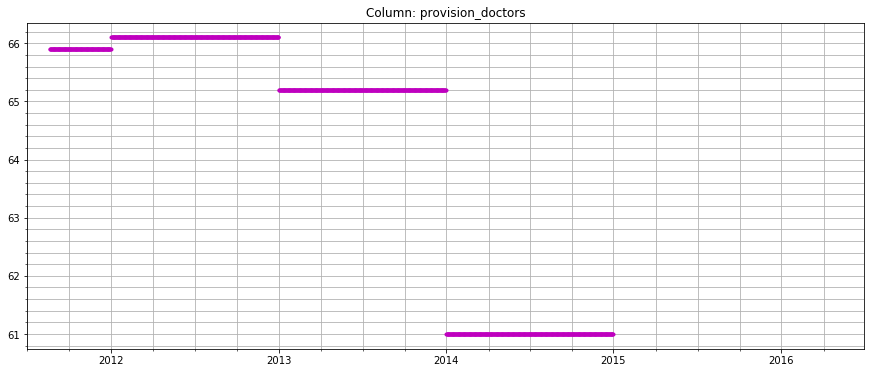

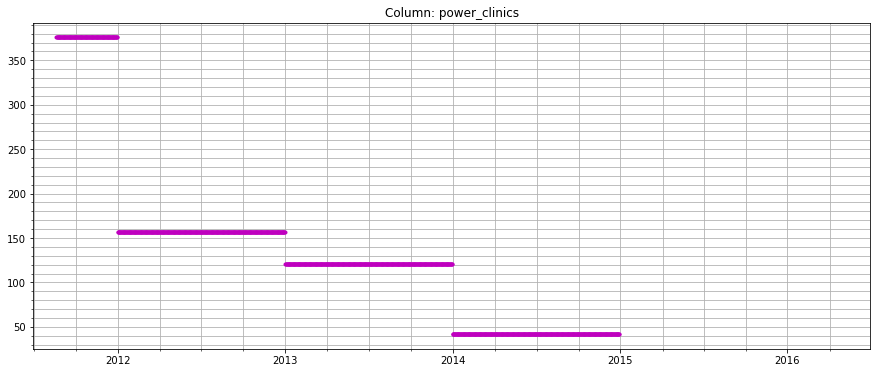

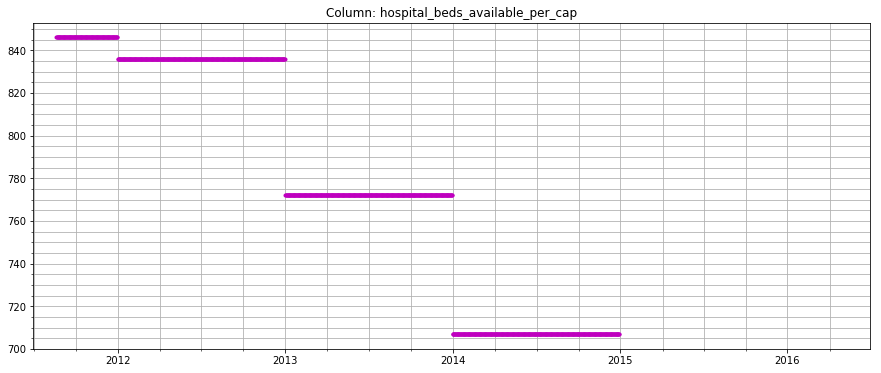

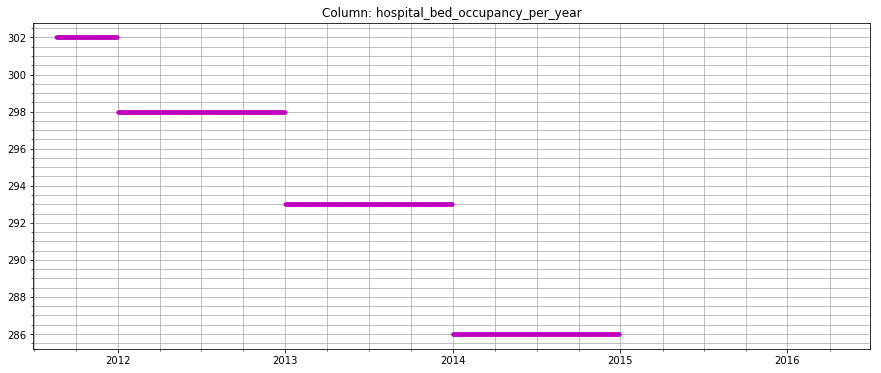

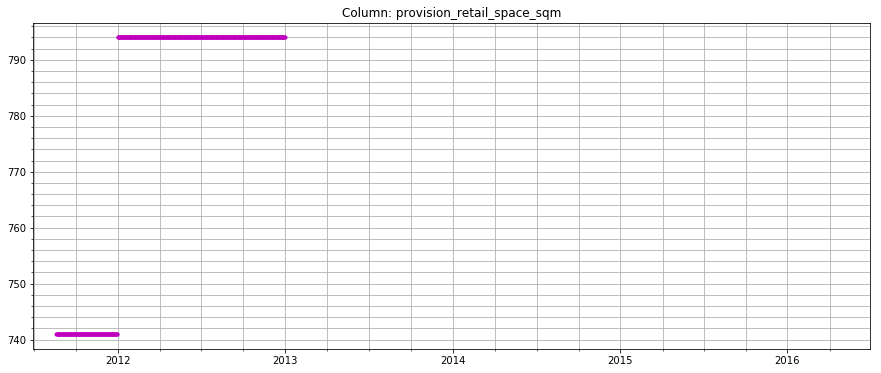

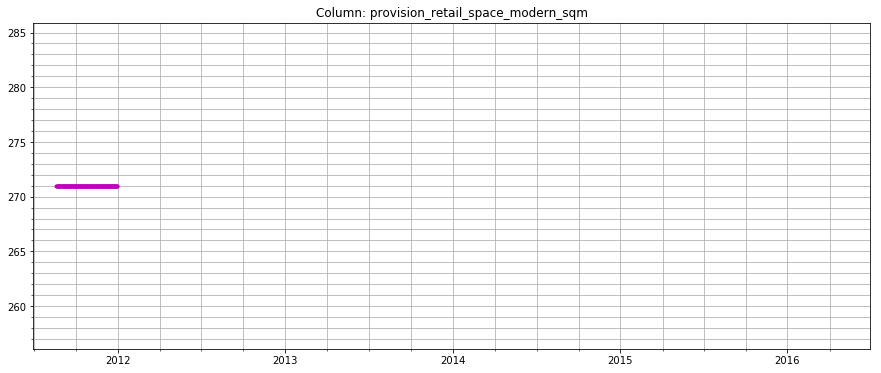

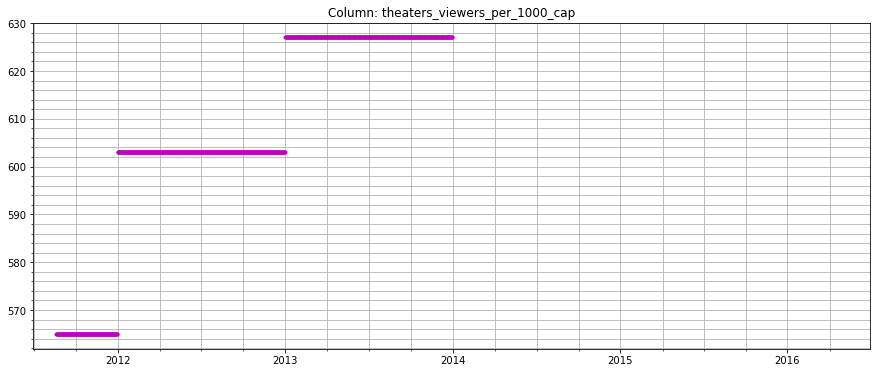

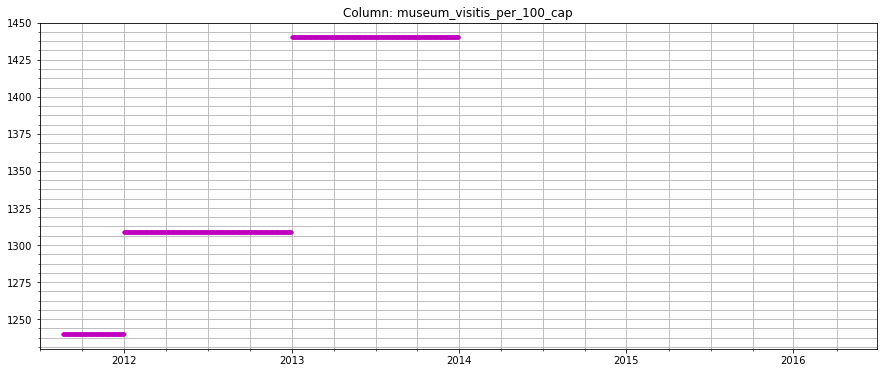

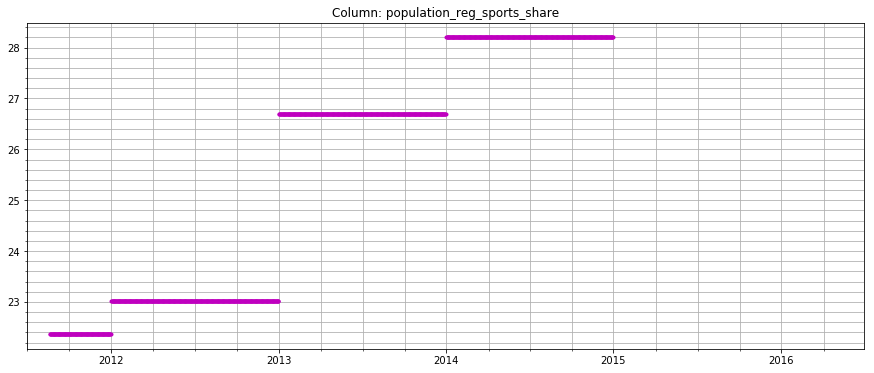

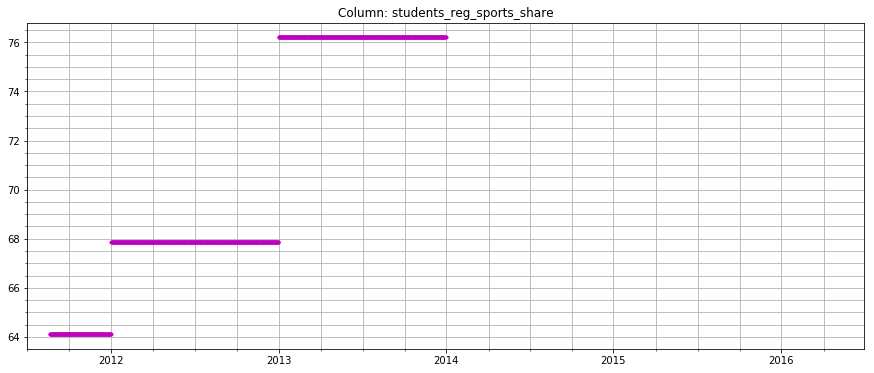

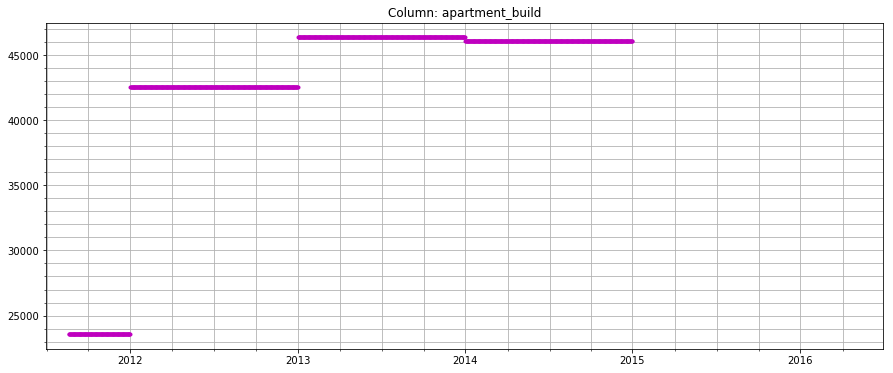

In [7]:
# данные полностью отсутствуют за 2015 и 2016 года
for i in range(1, len(fully_NA_in_test)):
    #print i
    plt.figure(figsize =(15,6))
    plt.plot(macro.timestamp, macro.loc[:,fully_NA_in_test[i]], 'm.')    
    plt.title('Column: ' + str(fully_NA_in_test[i]))
    plt.xlim(xmin = '2011-07-01', xmax = '2016-07-01')
    plt.minorticks_on()
    plt.grid(which='both')
    plt.show()

In [8]:
macro.drop(fully_NA_in_test, axis = 1, inplace = True)
macro.shape

(1746, 60)

In [9]:
macro_test = macro[test_dates]
partly_NA_in_test = []
for i in range(1, macro_test.shape[1]):
    if macro_test.iloc[:,i].count() != macro_test.shape[0]:
        partly_NA_in_test.append(macro_test.columns[i])
print len(partly_NA_in_test)
print partly_NA_in_test

25
['income_per_cap', 'salary', 'salary_growth', 'retail_trade_turnover', 'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth', 'labor_force', 'unemployment', 'employment', 'invest_fixed_capital_per_cap', 'invest_fixed_assets', 'pop_natural_increase', 'childbirth', 'mortality', 'average_life_exp', 'load_of_teachers_school_per_teacher', 'students_state_oneshift', 'modern_education_share', 'old_education_build_share', 'provision_nurse', 'load_on_doctors', 'turnover_catering_per_cap', 'seats_theather_rfmin_per_100000_cap', 'bandwidth_sports', 'apartment_fund_sqm']


C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


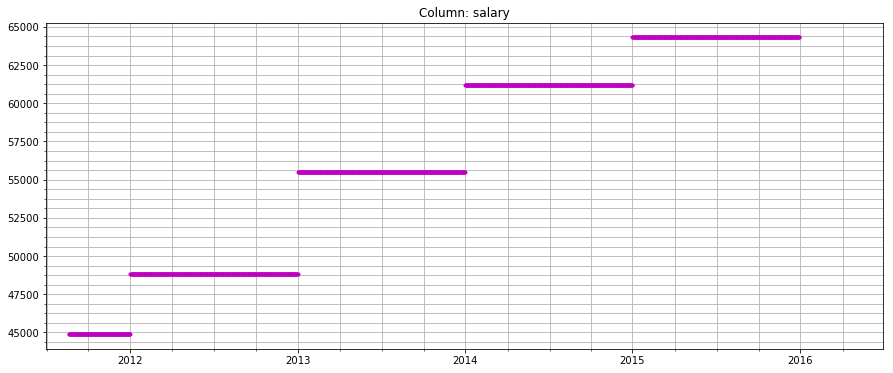

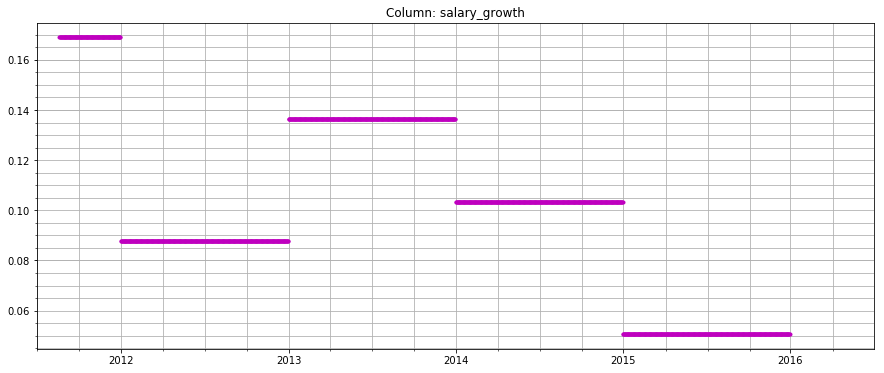

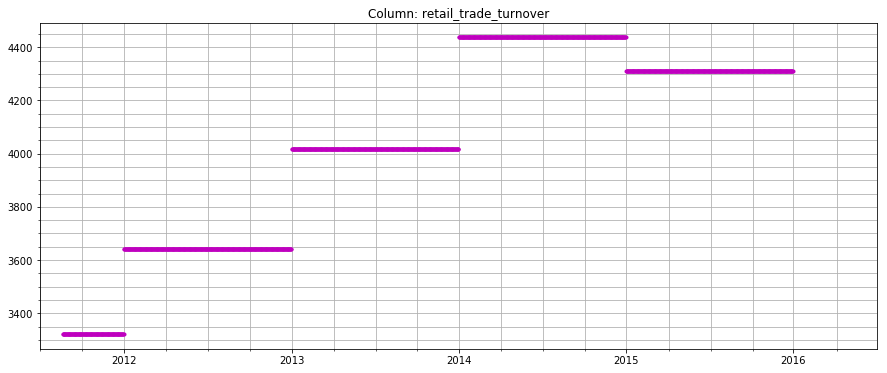

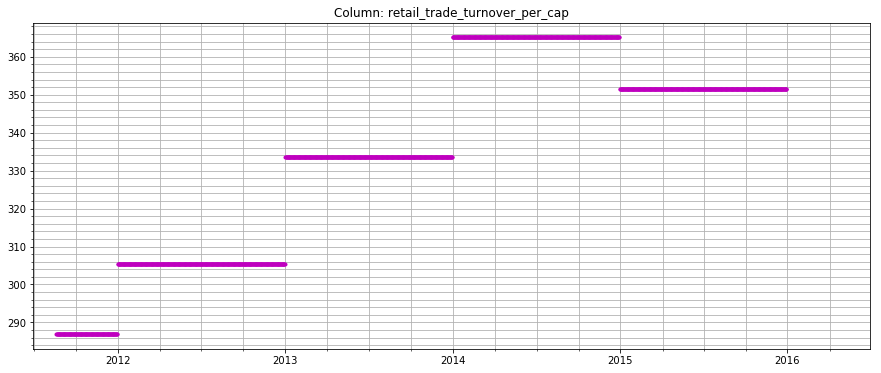

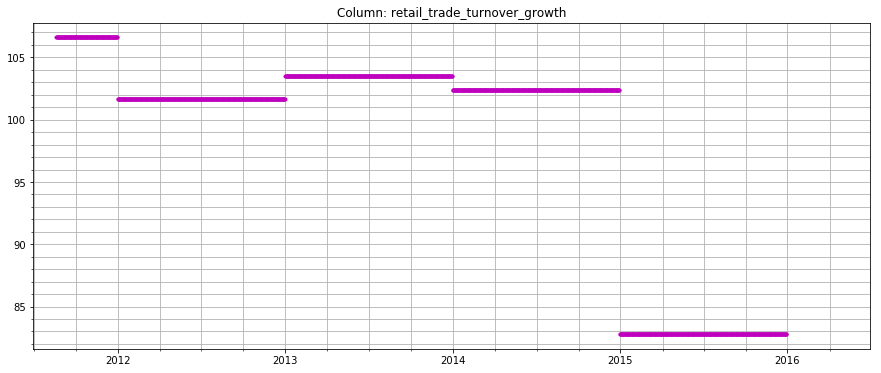

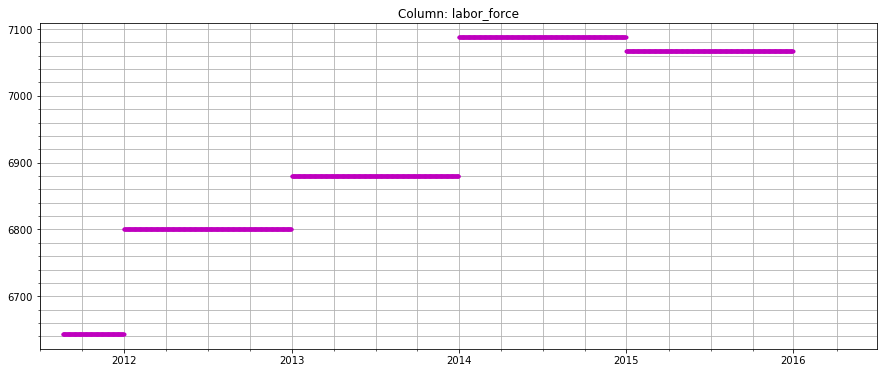

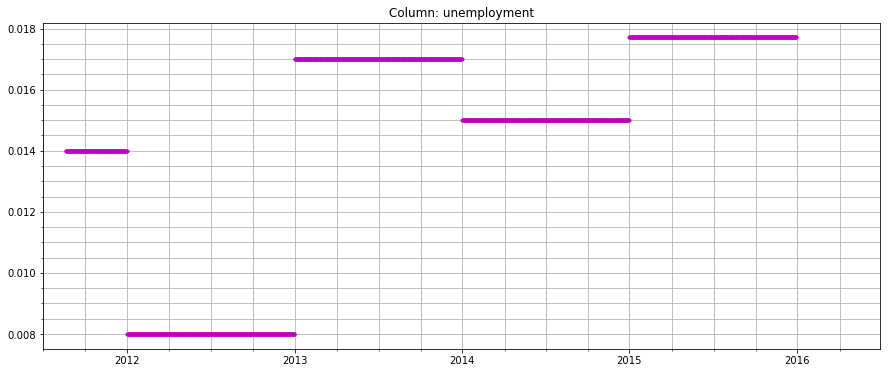

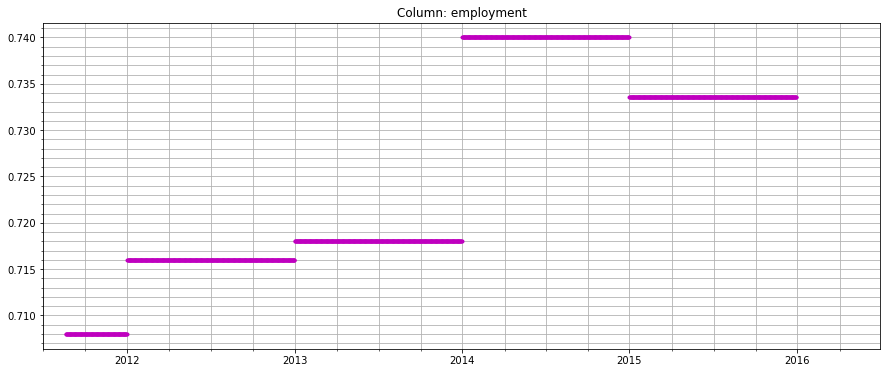

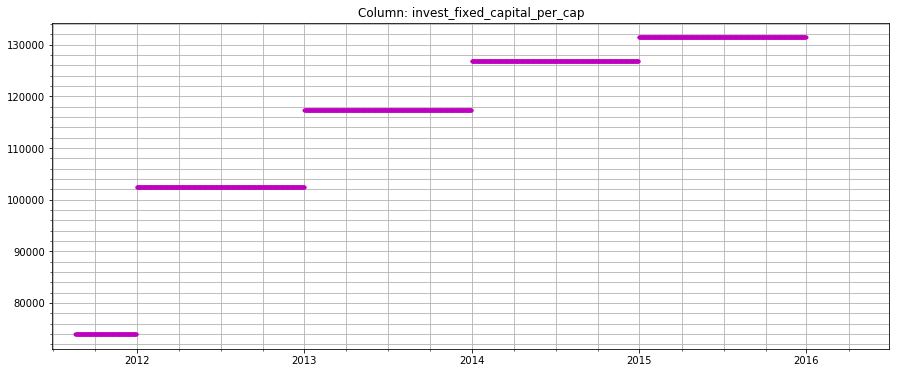

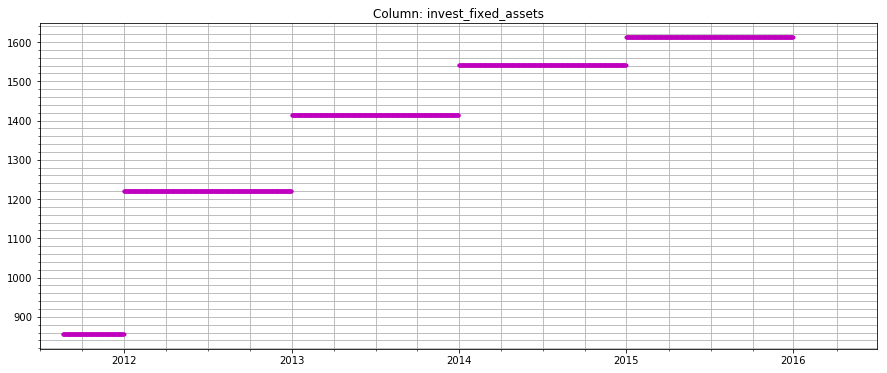

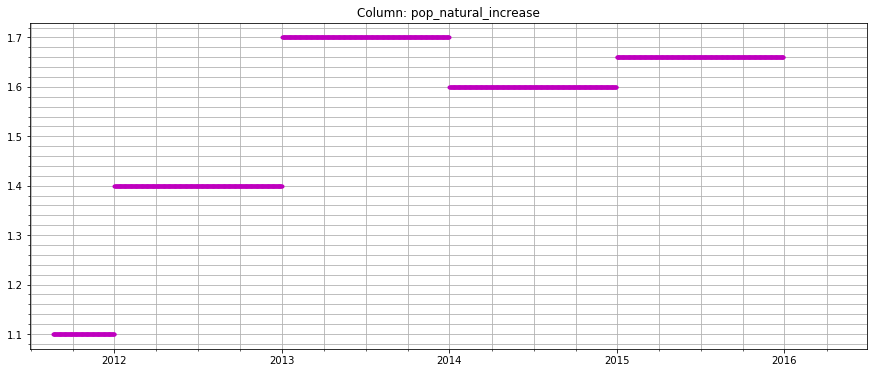

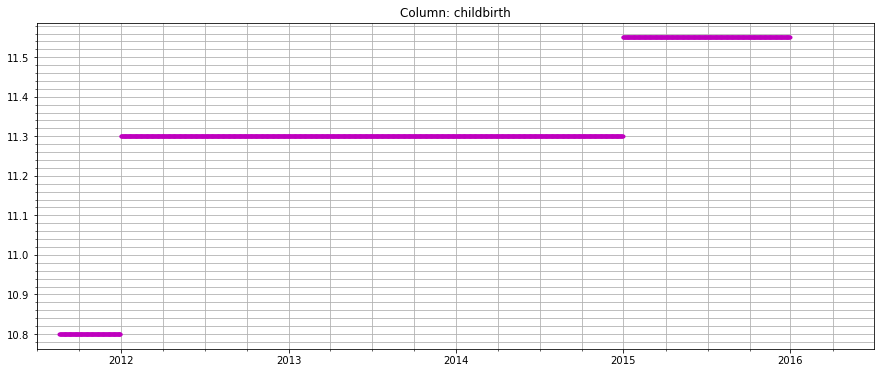

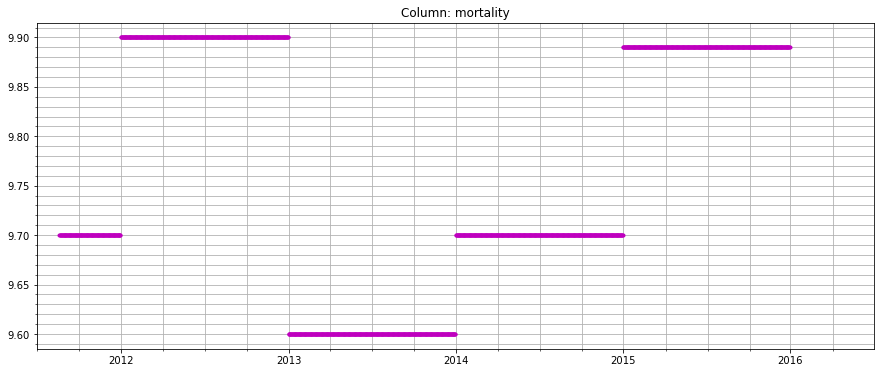

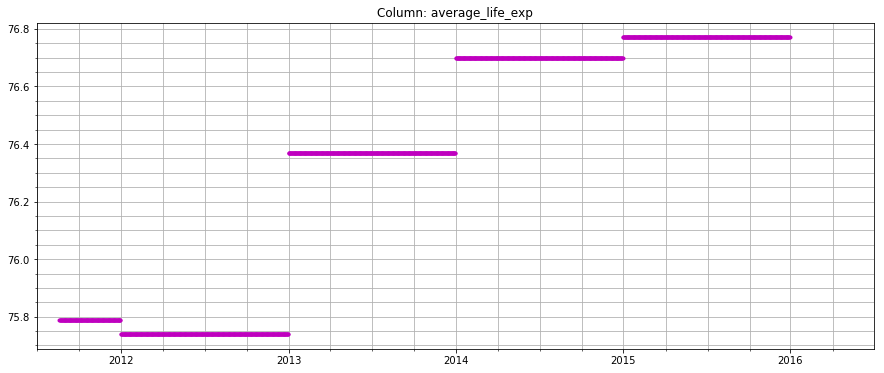

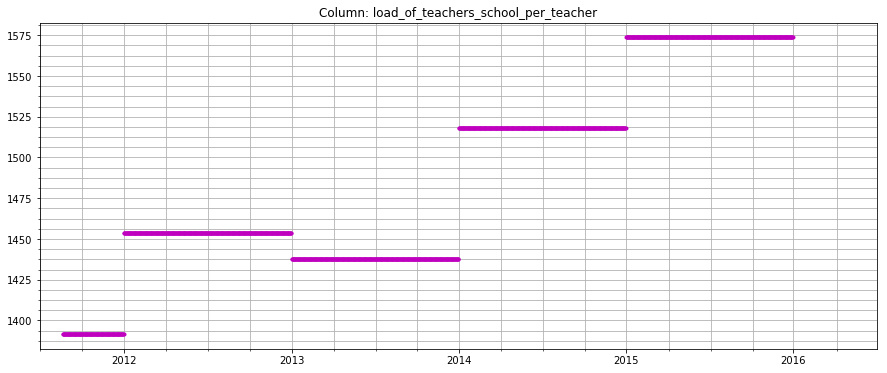

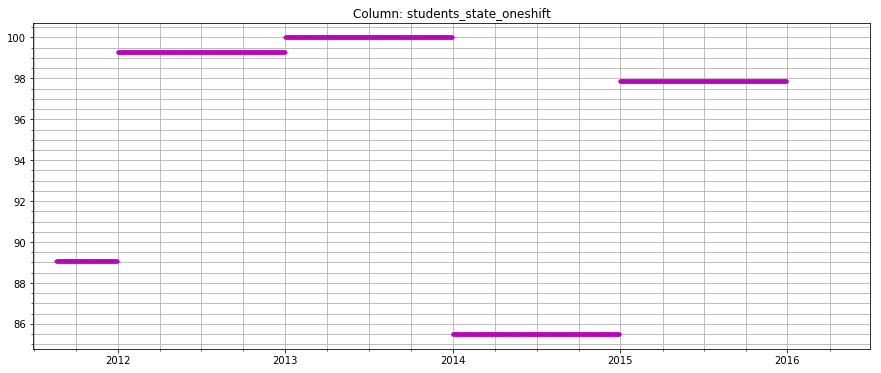

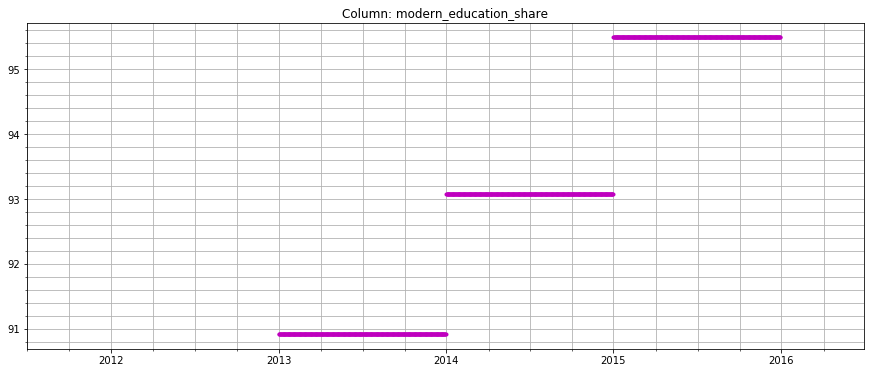

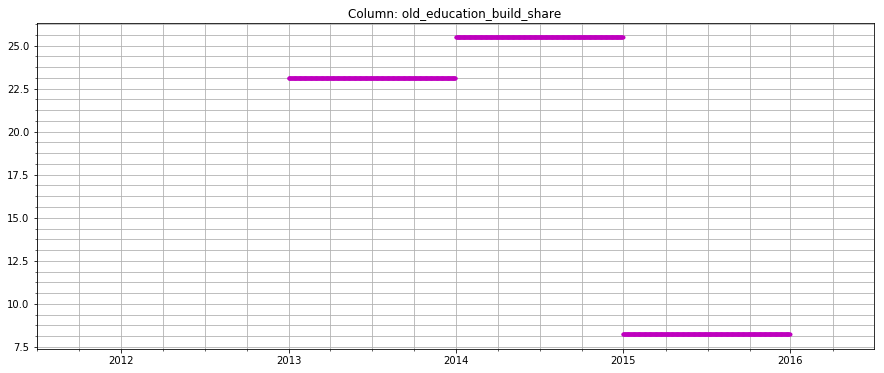

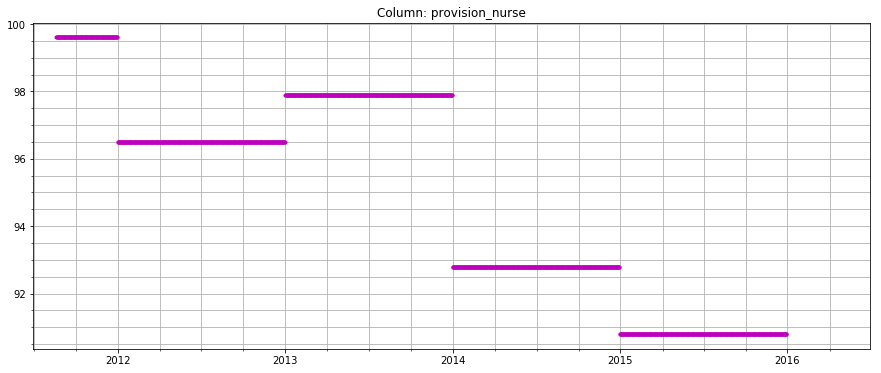

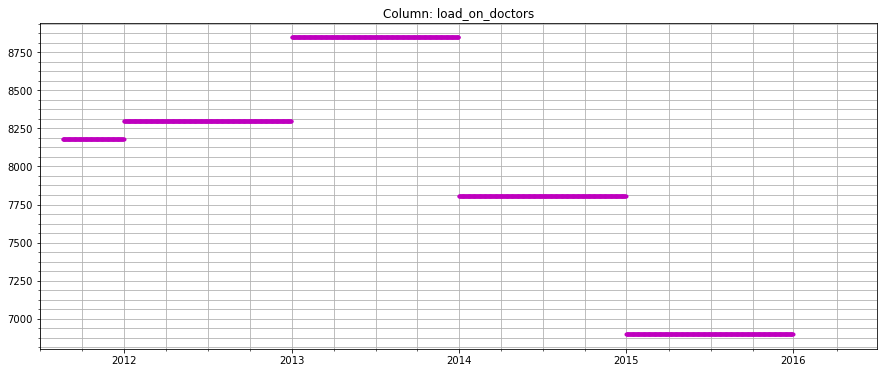

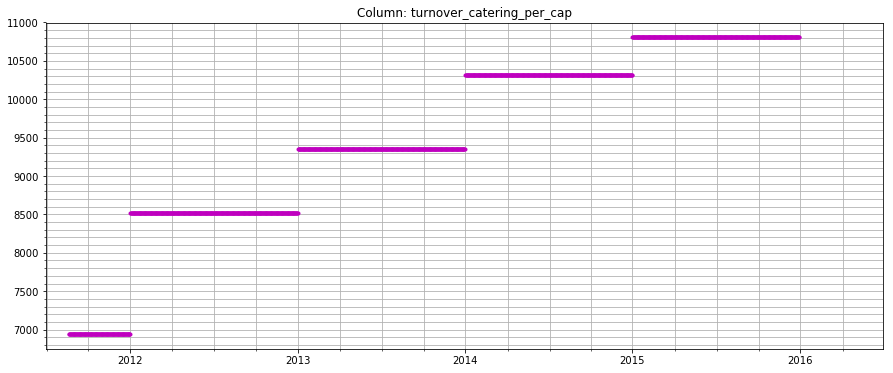

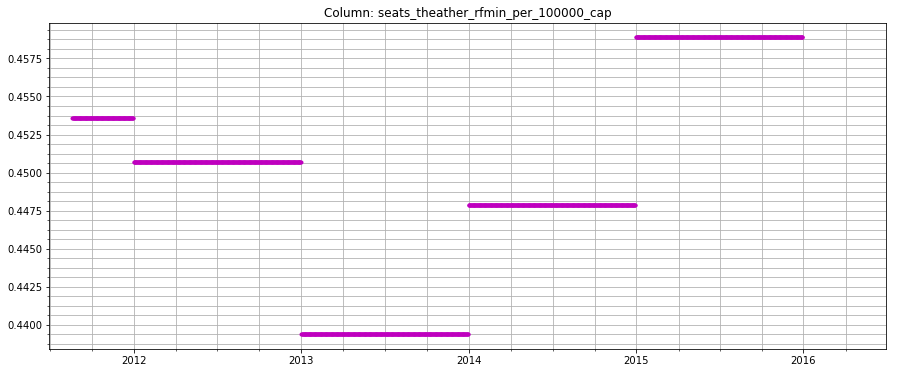

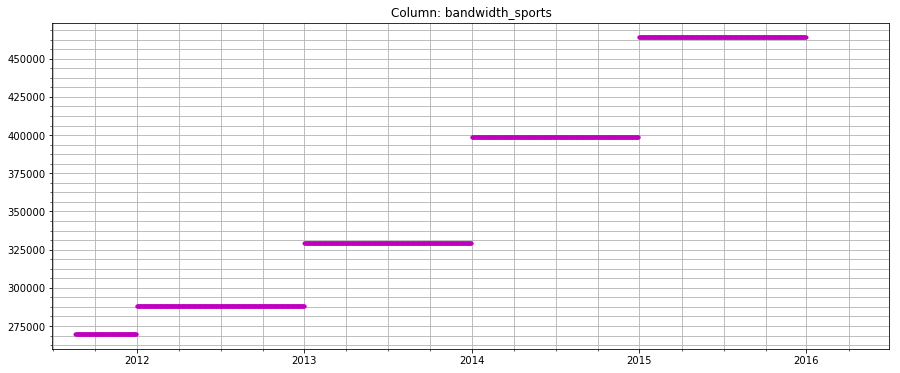

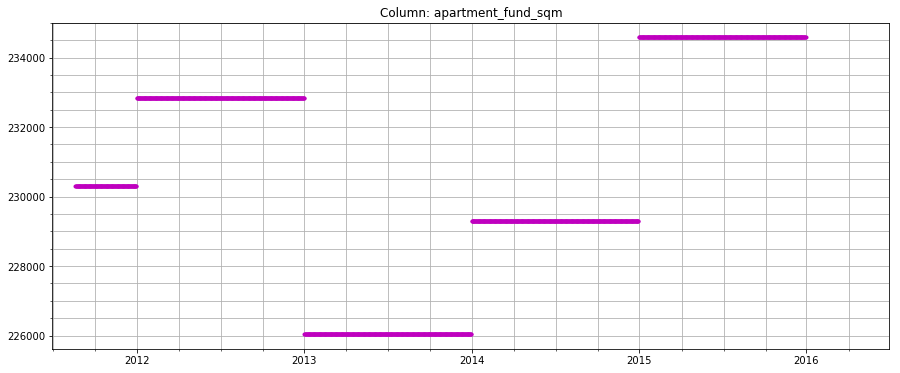

In [11]:
# отсутствуют данные за 2016 год
for i in range(1, len(partly_NA_in_test)):
    #print i
    plt.figure(figsize =(15,6))
    plt.plot(macro.timestamp, macro.loc[:,partly_NA_in_test[i]], 'm.')    
    plt.title('Column: ' + str(partly_NA_in_test[i]))
    plt.xlim(xmin = '2011-07-01', xmax = '2016-07-01')
    plt.minorticks_on()
    plt.grid(which='both')
    plt.show()

In [12]:
macro.drop(partly_NA_in_test, axis = 1, inplace = True)
macro.shape

(1746, 35)

1


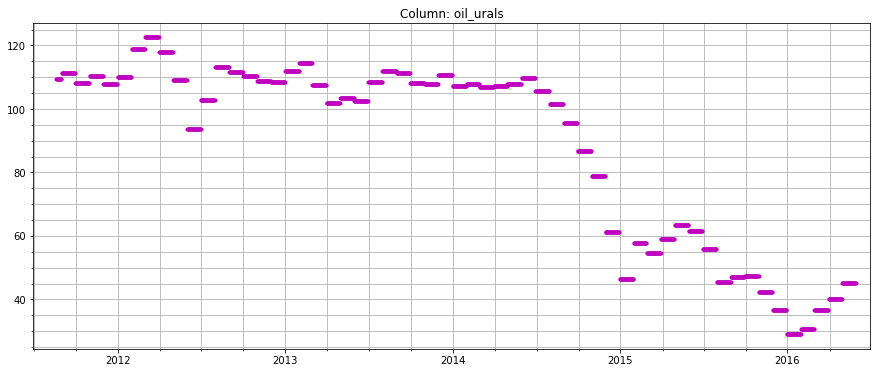

2


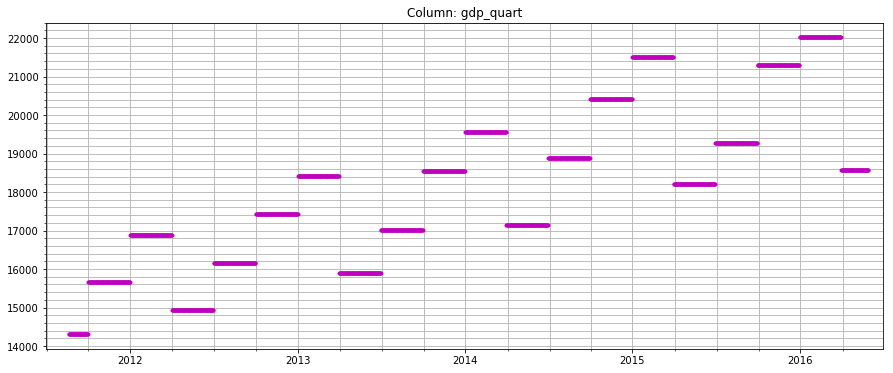

3


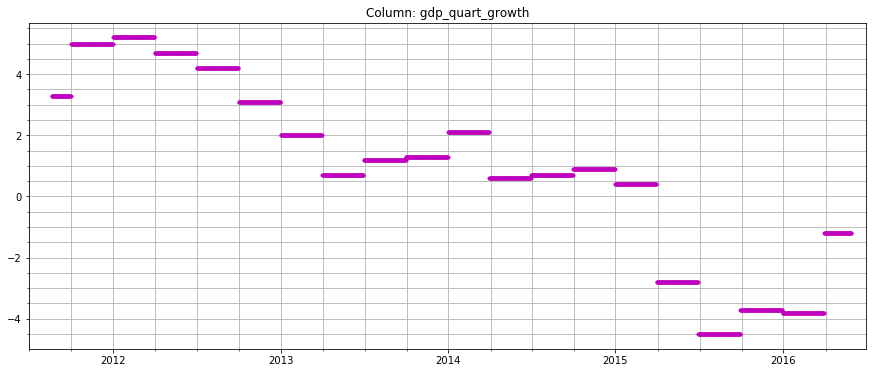

4


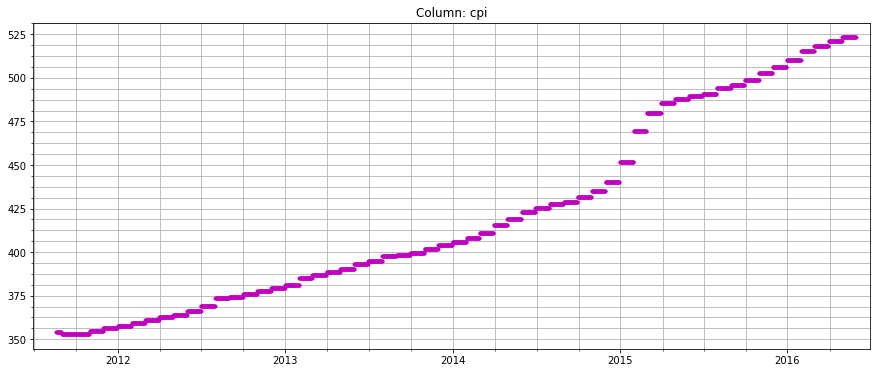

5


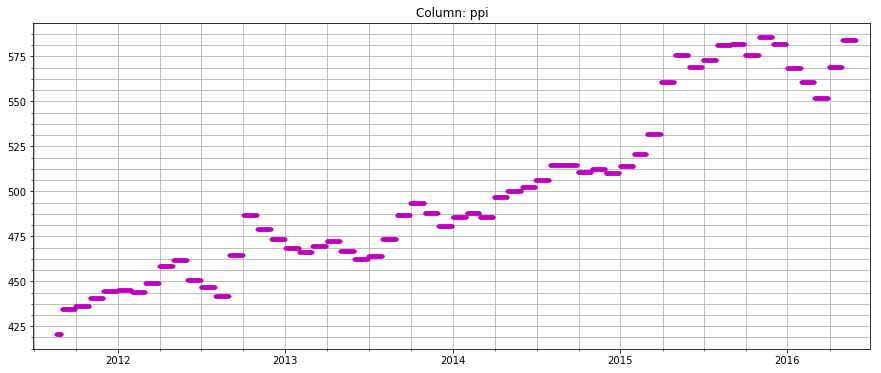

6


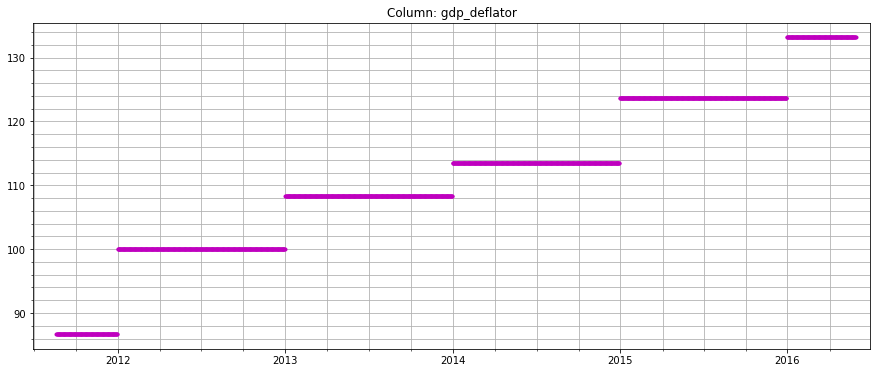

7


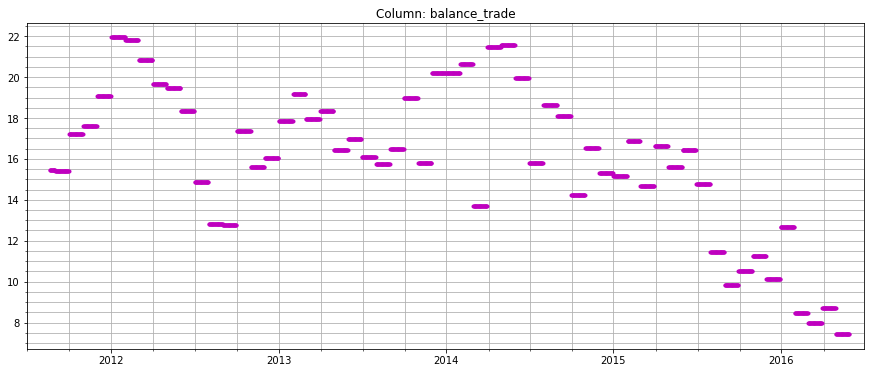

8


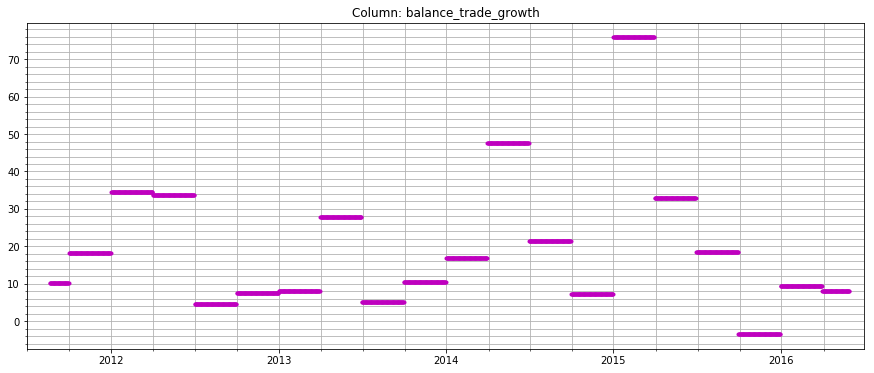

9


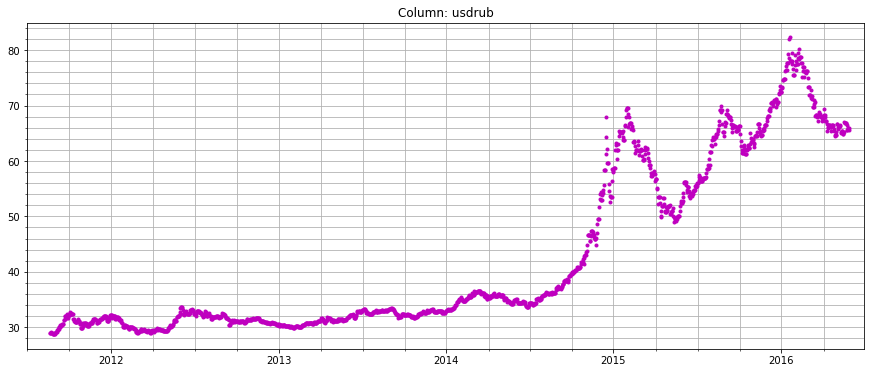

10


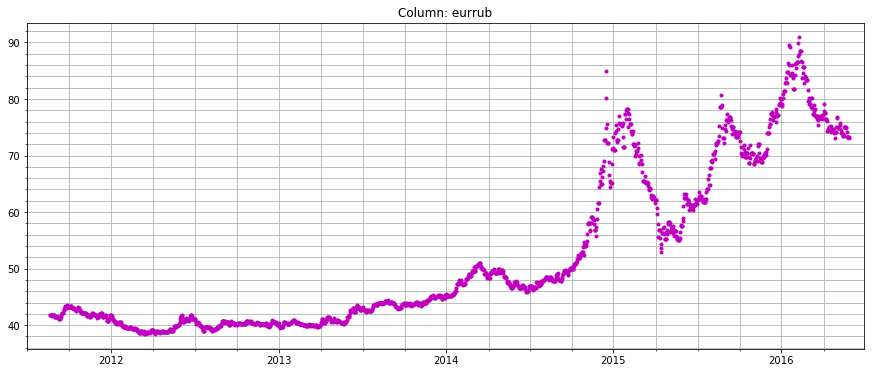

11


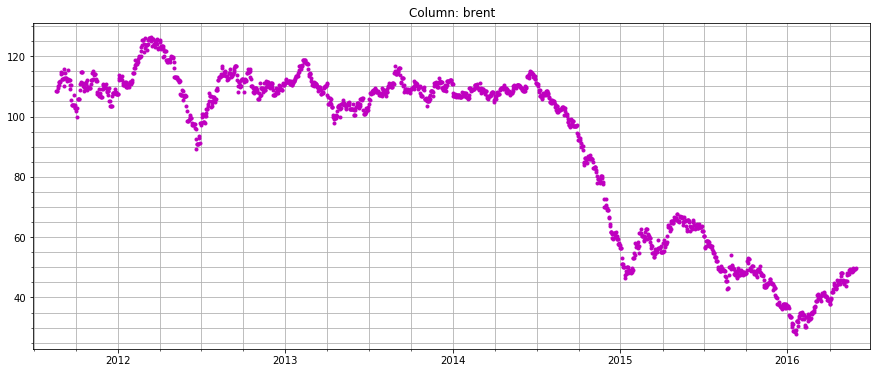

12


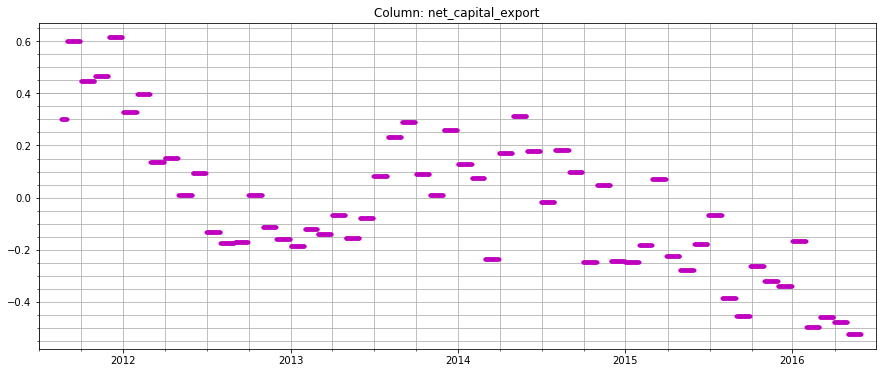

13


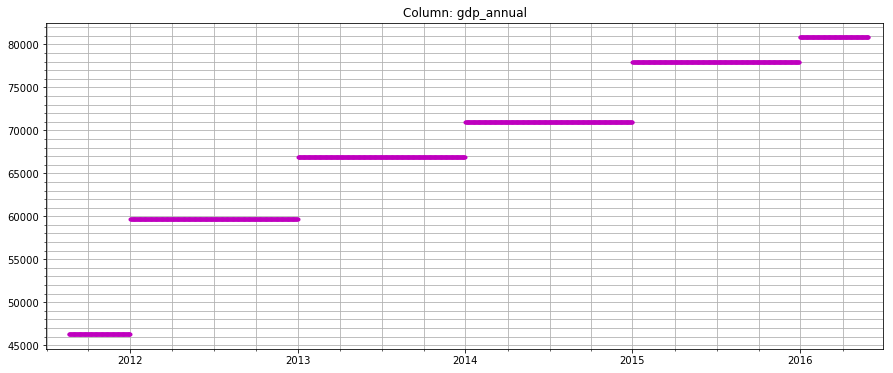

14


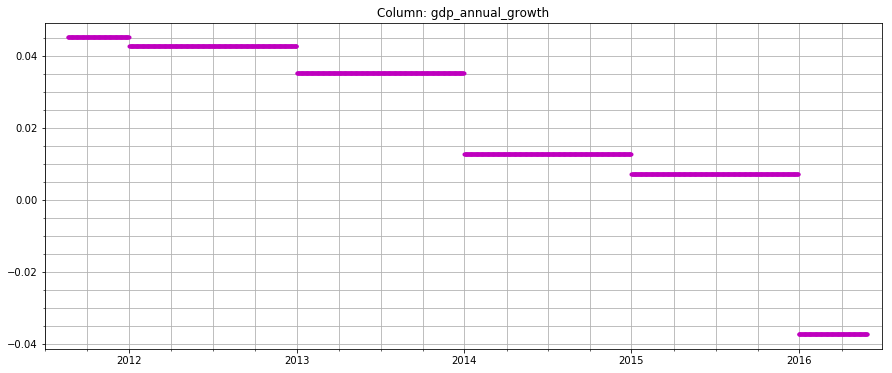

15


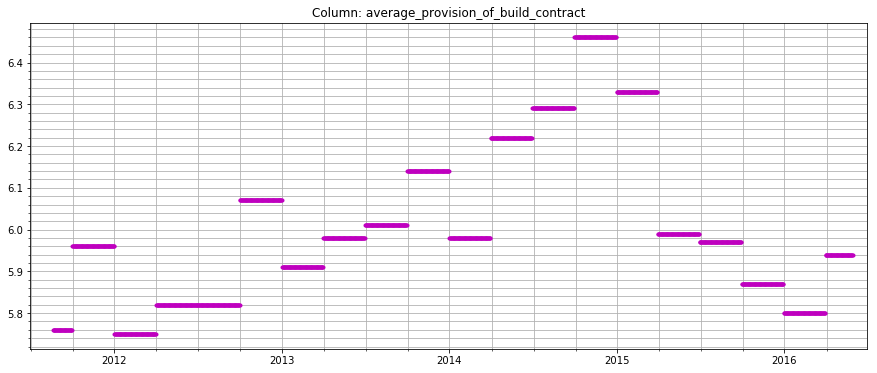

16


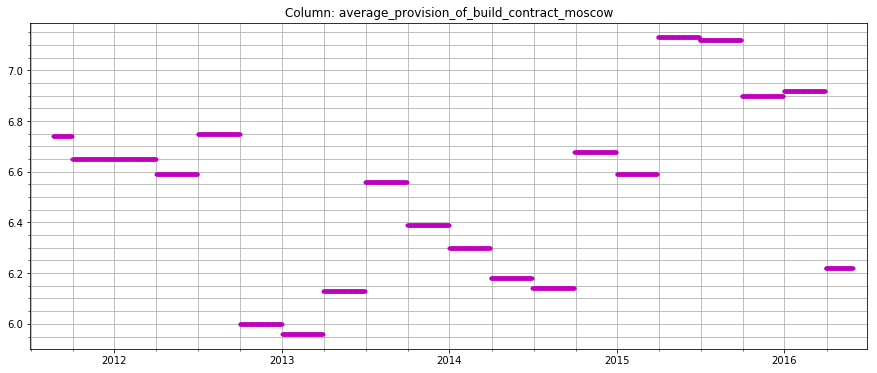

17


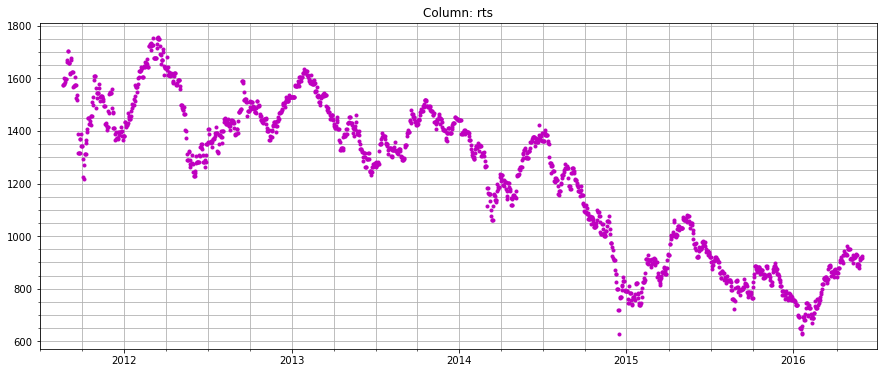

18


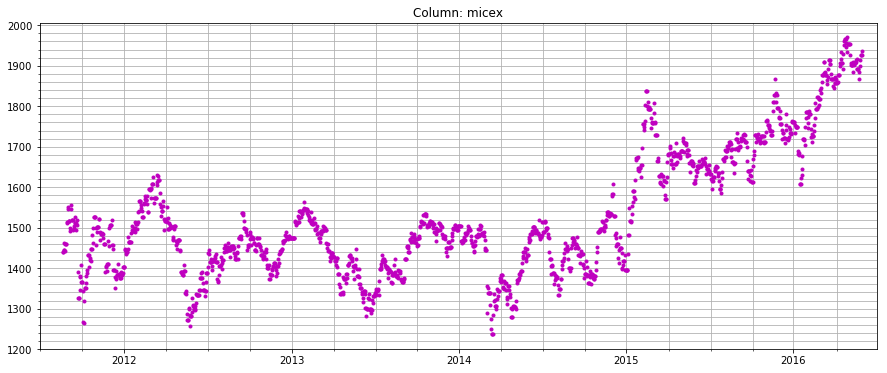

19


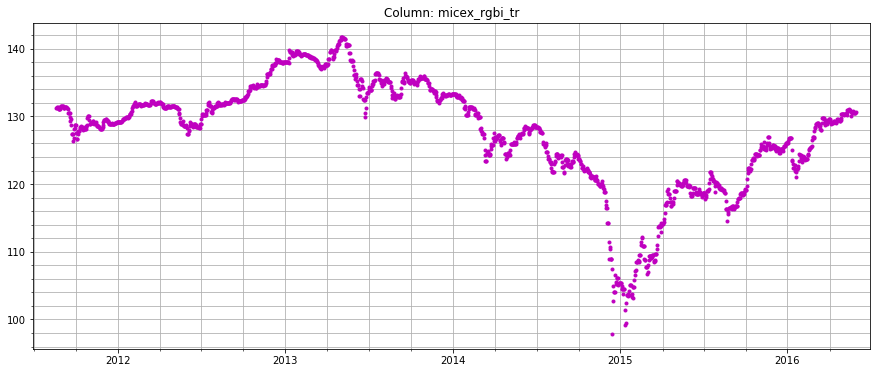

20


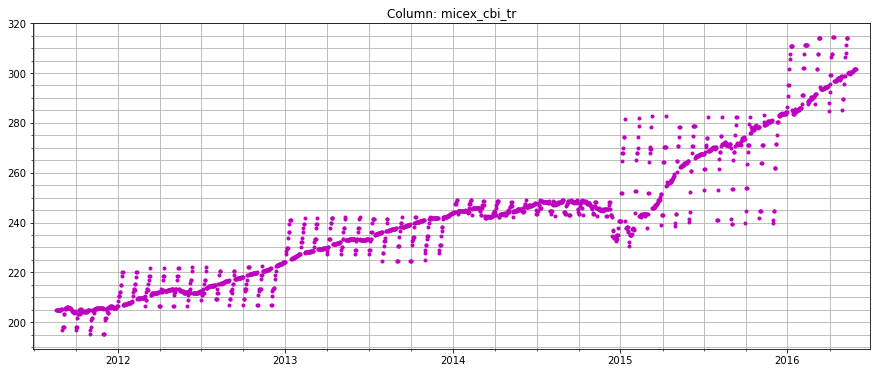

21


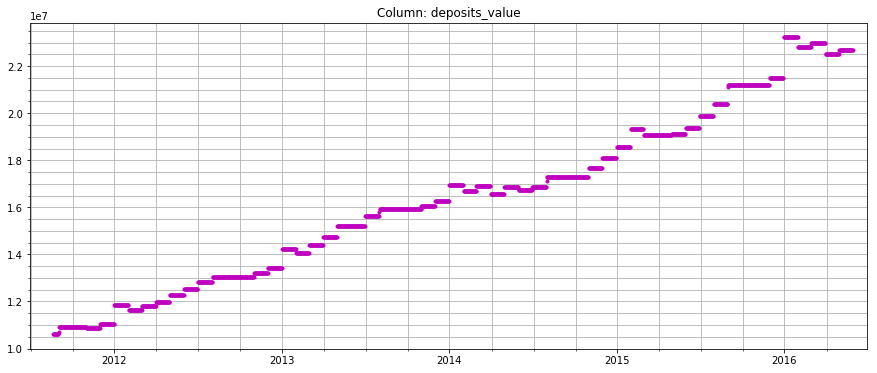

22


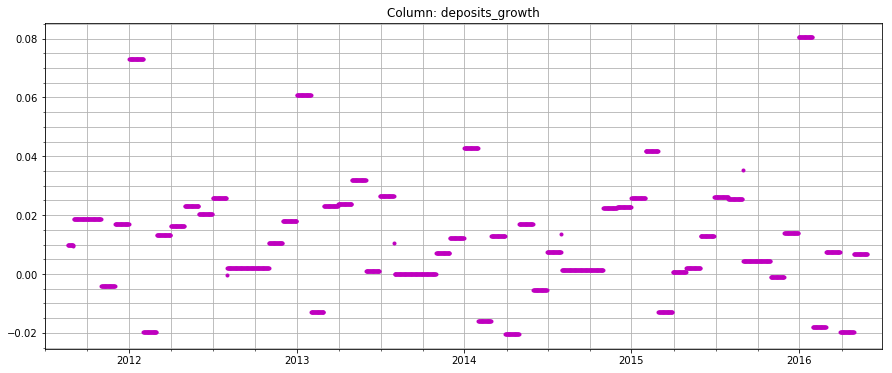

23


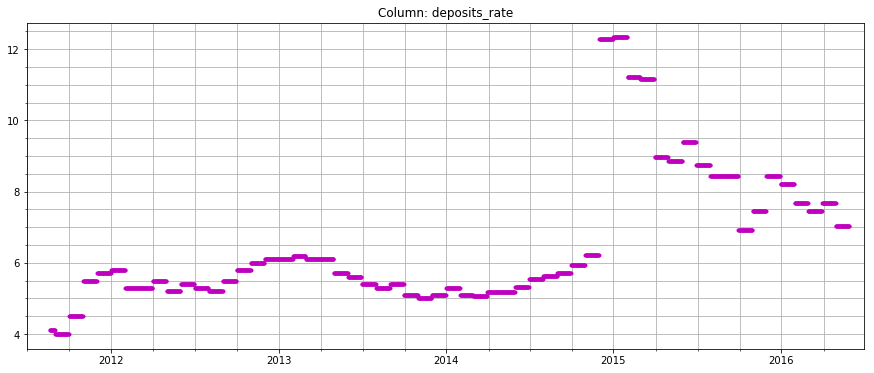

24


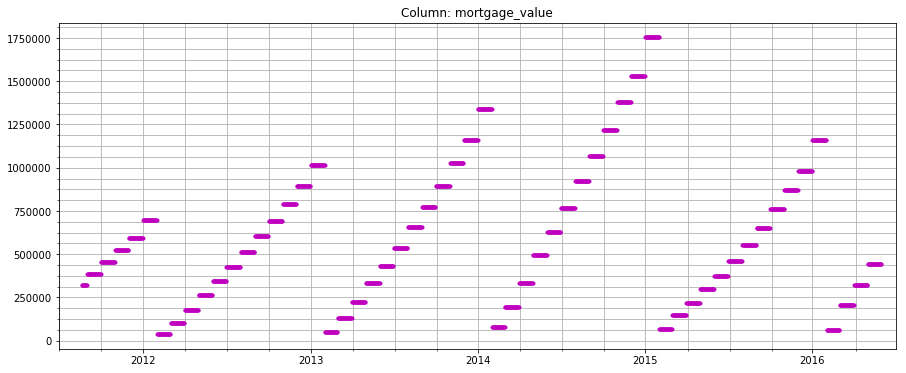

25


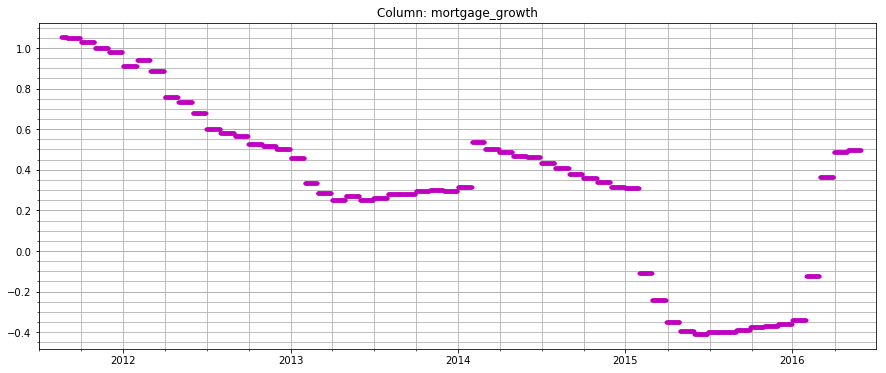

26


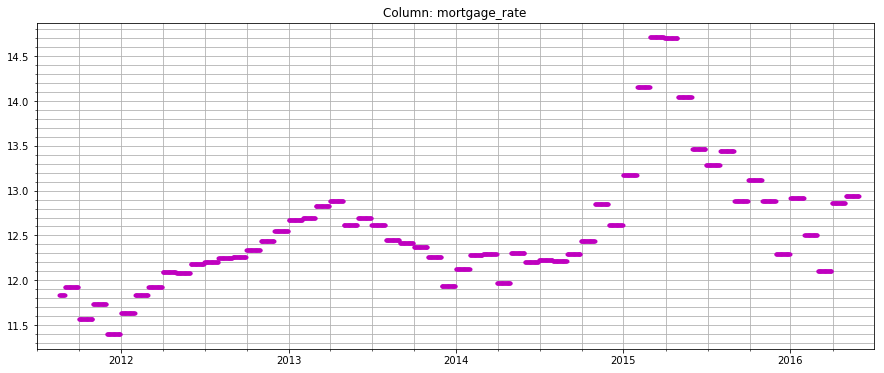

27


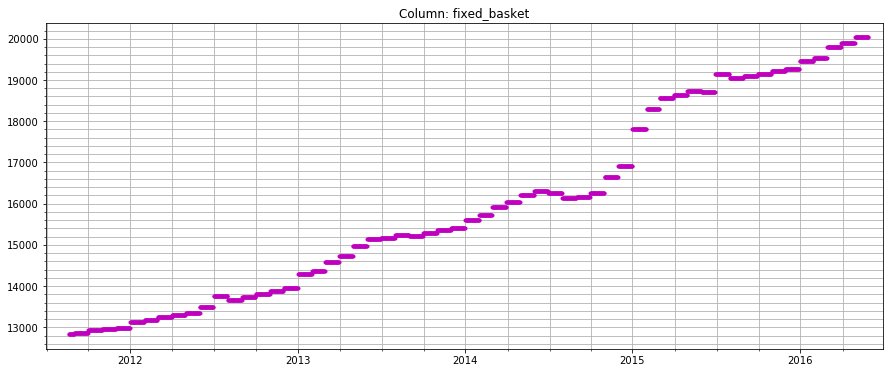

28


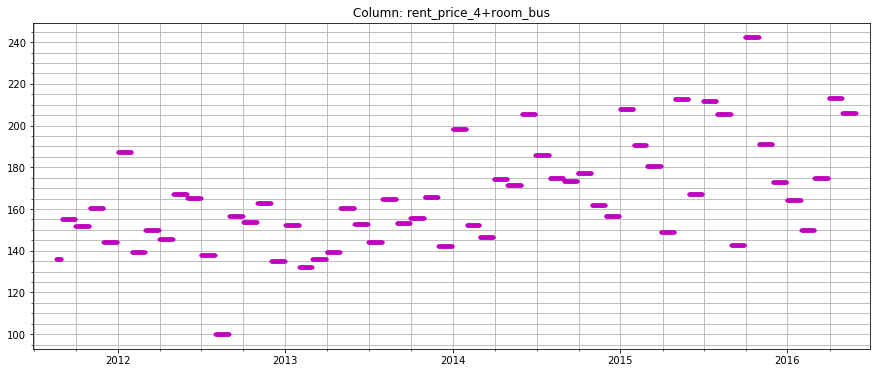

29


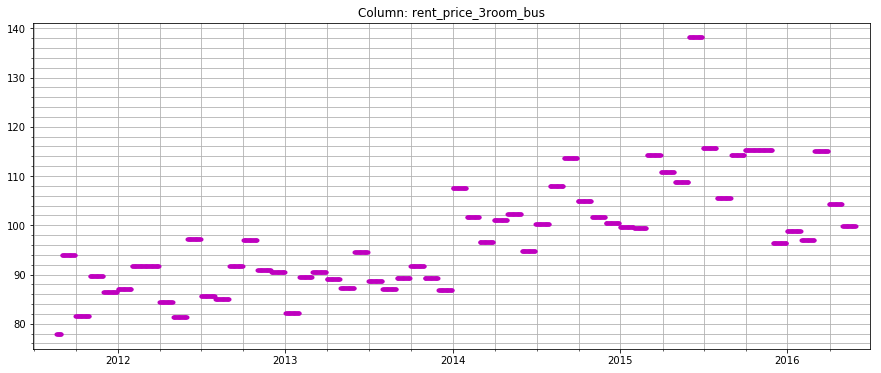

30


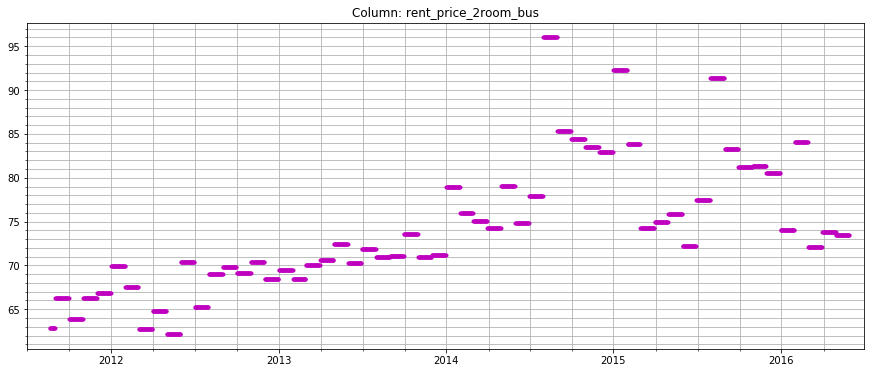

31


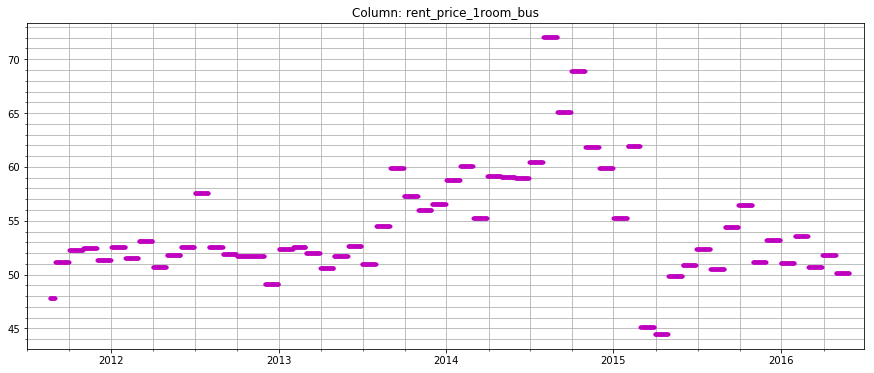

32


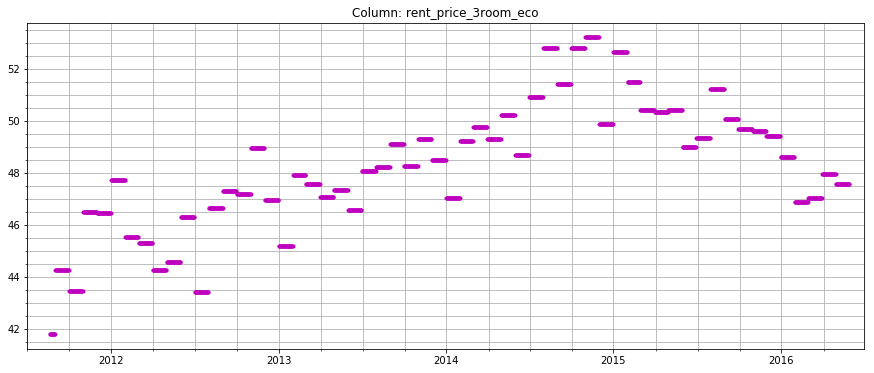

33


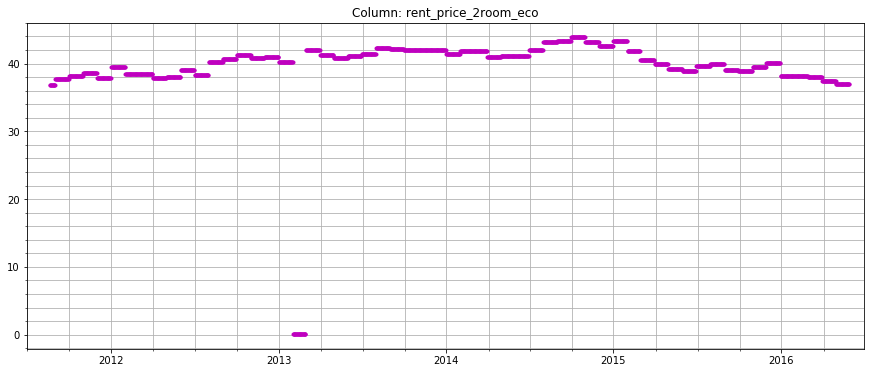

34


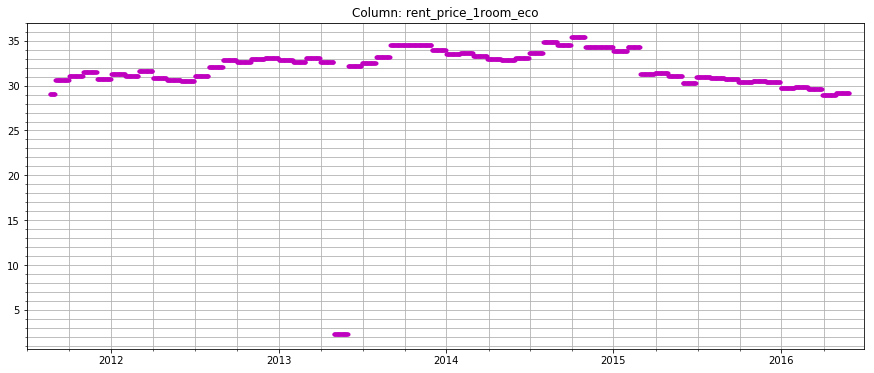

In [13]:
# зависимость от времени по каждому столбцу
for i in range(1, macro.shape[1]):
    #print i
    plt.figure(figsize =(15,6))
    plt.plot(macro.timestamp, macro.iloc[:,i], 'm.')    
    plt.title('Column: ' + str(macro.columns[i]))
    plt.xlim(xmin = '2011-07-01', xmax = '2016-07-01')
    plt.minorticks_on()
    plt.grid(which='both')
    plt.show()

In [19]:
# корреляции между столбцами
m = len(macro.columns)
print 'Number of columns', m
corr_matrix = np.zeros((m, m))
for i in range(1,m):
    for j in range(i+1, m):
        corr_matrix[i,j] = macro.iloc[:,[i,j]].corr(method='pearson').iloc[1,0]
        if abs(corr_matrix[i,j]) > 0.98:
            print macro.columns[i], macro.columns[j], corr_matrix[i, j]

Number of columns 35
oil_urals usdrub -0.983898374859
oil_urals brent 0.9958272112
cpi fixed_basket 0.994788379051
gdp_deflator gdp_annual 0.984453017569
usdrub eurrub 0.989672064965
usdrub brent -0.982948039952
deposits_value fixed_basket 0.983261607509


In [21]:
macro.to_csv('macro_cut.csv', header = True, sep=',', index=False)